<a href="https://colab.research.google.com/github/Seeeeeyo/test/blob/main/Adverse_Effect_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thesis - Adverse Effects Analysis**

*Selim Gilon*
*****



💡 Table of contents
1. ...


*****
## Imports 

In [6]:
!pip install numpy 
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install openpyxl
!pip install statsmodels

In [68]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import bs4
import requests
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
pd.options.mode.chained_assignment = None  # default='warn'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read Data

In [9]:
climate_data = pd.read_excel('/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Climatedata_beforefeature_20201120.xlsx')

In [10]:
climate_data.head()

,Datum_Tijd,Farmer,CO2_Koolstofdioxide_ppm,Luchtvochtigheid_%,Temperatuur_°C,Luchtvochtigheid_|_Weer_%,Temperatuur_|_Weer_°C,Ammoniak_NH3_ppm,Date,Month,Year,Round
0,2017-12-01 00:00:00,Farm_7,3137.50,59.0400,20.165,15.50,0.233333,0.0,2017-12-01,12,2017,1
1,2017-12-01 01:00:00,Farm_7,2767.00,52.9275,18.175,23.00,0.450000,0.0,2017-12-01,12,2017,1
2,2017-12-01 02:00:00,Farm_7,1808.00,34.7600,12.055,46.00,0.900000,0.0,2017-12-01,12,2017,1
3,2017-12-01 03:00:00,Farm_7,2757.75,52.1850,18.150,23.25,0.450000,0.0,2017-12-01,12,2017,1
4,2017-12-01 04:00:00,Farm_7,2801.60,54.7020,19.240,18.80,0.280000,0.0,2017-12-01,12,2017,1


In [11]:
# climate_data['CO2_Koolstofdioxide_ppm'][0]
# print(climate_data['CO2_Koolstofdioxide_ppm'].values[0])

In [12]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231865 entries, 0 to 231864
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Datum_Tijd                 231865 non-null  object 
 1   Farmer                     231865 non-null  object 
 2   CO2_Koolstofdioxide_ppm    231865 non-null  float64
 3   Luchtvochtigheid_%         231865 non-null  float64
 4   Temperatuur_°C             231865 non-null  float64
 5   Luchtvochtigheid_|_Weer_%  231865 non-null  float64
 6   Temperatuur_|_Weer_°C      231865 non-null  float64
 7   Ammoniak_NH3_ppm           231865 non-null  float64
 8   Date                       231865 non-null  object 
 9   Month                      231865 non-null  int64  
 10  Year                       231865 non-null  int64  
 11  Round                      231865 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 21.2+ MB


In [13]:
# Divide the data. Create a new df for each farm from the 1st part of the data 
# which contains all the farms
climate_Farm_1 = climate_data[climate_data["Farmer"] == "Farm_1"]
climate_Farm_2 = climate_data[climate_data["Farmer"] == "Farm_2"]
climate_Farm_3 = climate_data[climate_data["Farmer"] == "Farm_3"]
climate_Farm_4 = climate_data[climate_data["Farmer"] == "Farm_4"]
climate_Farm_5 = climate_data[climate_data["Farmer"] == "Farm_5"]
climate_Farm_6 = climate_data[climate_data["Farmer"] == "Farm_6"]
climate_Farm_7 = climate_data[climate_data["Farmer"] == "Farm_7"]
climate_Farm_8 = climate_data[climate_data["Farmer"] == "Farm_8"]
climate_Farm_9 = climate_data[climate_data["Farmer"] == "Farm_9"]
climate_Farm_10 = climate_data[climate_data["Farmer"] == "Farm_10"]
climate_Farm_11 = climate_data[climate_data["Farmer"] == "Farm_11"]
climate_Farm_12 = climate_data[climate_data["Farmer"] == "Farm_12"]

original_num_entries_farm_1 = climate_Farm_1.shape[0]
original_num_entries_farm_2 = climate_Farm_2.shape[0]
original_num_entries_farm_3 = climate_Farm_3.shape[0]
original_num_entries_farm_4 = climate_Farm_4.shape[0]
original_num_entries_farm_5 = climate_Farm_5.shape[0]
original_num_entries_farm_6 = climate_Farm_6.shape[0]
original_num_entries_farm_7 = climate_Farm_7.shape[0]
original_num_entries_farm_8 = climate_Farm_8.shape[0]
original_num_entries_farm_9 = climate_Farm_9.shape[0]
original_num_entries_farm_10 = climate_Farm_10.shape[0]
original_num_entries_farm_11 = climate_Farm_11.shape[0]
#original_num_entries_farm_12 = climate_Farm_12.shape[0]

print("There are", climate_Farm_1.shape[0], "entries for Farm 1.")
print("There are", climate_Farm_2.shape[0], "entries for Farm 2.")
print("There are", climate_Farm_3.shape[0], "entries for Farm 3.")
print("There are", climate_Farm_4.shape[0], "entries for Farm 4.")
print("There are", climate_Farm_5.shape[0], "entries for Farm 5.")
print("There are", climate_Farm_6.shape[0], "entries for Farm 6.")
print("There are", climate_Farm_7.shape[0], "entries for Farm 7.")
print("There are", climate_Farm_8.shape[0], "entries for Farm 8.")
print("There are", climate_Farm_9.shape[0], "entries for Farm 9.")
print("There are", climate_Farm_10.shape[0], "entries for Farm 10.")
print("There are", climate_Farm_11.shape[0], "entries for Farm 11.")
#print("There are", climate_Farm_12.shape[0], "entries for Farm 12.")

# array of the farms' data

# This one incudes farm 12
# climate_data_all_farms_uncleaned = [climate_Farm_1,climate_Farm_2,climate_Farm_3,climate_Farm_4,climate_Farm_5,climate_Farm_6,climate_Farm_7,climate_Farm_8,climate_Farm_9,climate_Farm_10,climate_Farm_11,climate_Farm_12]
climate_data_all_farms_uncleaned = [climate_Farm_1,climate_Farm_2,climate_Farm_3,climate_Farm_4,climate_Farm_5,climate_Farm_6,climate_Farm_7,climate_Farm_8,climate_Farm_9,climate_Farm_10,climate_Farm_11]


There are 21017 entries for Farm 1.
There are 21498 entries for Farm 2.
There are 21801 entries for Farm 3.
There are 21459 entries for Farm 4.
There are 19313 entries for Farm 5.
There are 12108 entries for Farm 6.
There are 22300 entries for Farm 7.
There are 21478 entries for Farm 8.
There are 19485 entries for Farm 9.
There are 19628 entries for Farm 10.
There are 19453 entries for Farm 11.


In [14]:
# Add a column that will be used later in order to identify which row 
# correspond to which round.
climate_data["Round_c"] = 0
climate_data.head()

,Datum_Tijd,Farmer,CO2_Koolstofdioxide_ppm,Luchtvochtigheid_%,Temperatuur_°C,Luchtvochtigheid_|_Weer_%,Temperatuur_|_Weer_°C,Ammoniak_NH3_ppm,Date,Month,Year,Round,Round_c
0,2017-12-01 00:00:00,Farm_7,3137.50,59.0400,20.165,15.50,0.233333,0.0,2017-12-01,12,2017,1,0
1,2017-12-01 01:00:00,Farm_7,2767.00,52.9275,18.175,23.00,0.450000,0.0,2017-12-01,12,2017,1,0
2,2017-12-01 02:00:00,Farm_7,1808.00,34.7600,12.055,46.00,0.900000,0.0,2017-12-01,12,2017,1,0
3,2017-12-01 03:00:00,Farm_7,2757.75,52.1850,18.150,23.25,0.450000,0.0,2017-12-01,12,2017,1,0
4,2017-12-01 04:00:00,Farm_7,2801.60,54.7020,19.240,18.80,0.280000,0.0,2017-12-01,12,2017,1,0


## Plot Functions

In [15]:
# function for a line plot 
def plot_p(df, x_col, y_col,num_farm, threshold):
    fig, ax = plt.subplots(figsize=(22,6))
    df.plot(x=x_col, y=y_col, ax=ax)
    plt.legend(loc='upper left')
    plt.axhline(y=threshold, color='r', linestyle='-')
    tit = "Farm", num_farm
    plt.title(tit)
    ax.grid(True)
    fmt_half_year = mdates.MonthLocator(interval=6)
    ax.xaxis.set_major_locator(fmt_half_year)
    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    ax.xaxis.set_minor_locator(fmt_month)
    # Text in the x axis will be displayed in 'YYYY-mm' format.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    # Round to nearest years.
    datemax = data.iloc[-1][0].date()
    datemin = data.iloc[0][0].date() 
    ax.set_xlim(datemin, datemax)
    # Rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them.
    fig.autofmt_xdate()

    plt.show()

In [16]:
# function for a zoomed line plot 
def plot_p_zoom(df, x_col, y_col, mini, maxi,threshold):
    zoom_range = df[(df[x_col] >= mini) & (df[x_col] < maxi)].index
    xmin = zoom_range.min()
    xmax = zoom_range.max()
    fig, ax = plt.subplots(figsize=(22,6))
    df.loc[zoom_range].plot(x=x_col, y=y_col, ax=ax, color="blue")
    #plt.hlines(y=1000, xmin=xmin, xmax=xmax,color="red")
    plt.axhline(y=threshold, color='r', linestyle='-')
    plt.legend(loc='upper left')

In [17]:
def plot_with_rounds_separation(df,dates,x_col,y_col,num,threshold):
  fig, ax = plt.subplots(figsize=(22,6))
  df.plot(x=x_col, y=y_col, ax=ax)
  plt.axhline(y=threshold, color='r', linestyle='-',label = 'Threshold')
  plt.vlines(x=dates, color='green', linestyle='-', ymin = 0, ymax = df[y_col].max(), label = 'Possible rounds')
  plt.legend(loc='upper left')
  tit = "Farm", num
  plt.title(tit)
  ax.grid(True)
  fmt_half_year = mdates.MonthLocator(interval=6)
  ax.xaxis.set_major_locator(fmt_half_year)
  # Minor ticks every month.
  fmt_month = mdates.MonthLocator()
  ax.xaxis.set_minor_locator(fmt_month)
  # Text in the x axis will be displayed in 'YYYY-mm' format.
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  # Round to nearest years.
  datemax = df.iloc[-1][0].date()
  datemin = df.iloc[0][0].date() 
  ax.set_xlim(datemin, datemax)
  # Rotates and right aligns the x labels, and moves the bottom of the
  # axes up to make room for them.
  fig.autofmt_xdate()
  plt.show()
  #cd_krabben_full.loc[cd_krabben_full['date'] == '2020-10-26 09:00:00'][]
  # cd_krabben_full.loc[cd_krabben_full['Round'] == NaN]

In [18]:
def plot_sep_smoothed(df,dates,x_col,y_col,num,threshold,window):
  df["smooth"] = df[y_col].rolling(window = window, center = False).mean()
  data = [df[x_col], df['smooth']]
  headers = ["date", "smooth"]
  sm = pd.concat(data, axis=1, keys=headers)

  fig, ax = plt.subplots(figsize=(22,6))
  df.plot(x="date", y=y_col, ax=ax, label="observed CO2(ppm)", c='lightgrey')
  plt.axhline(y=threshold, color='r', linestyle='-',label = 'Threshold')
  sm.plot(x="date", y="smooth",ax=ax, label="smooth CO2(ppm)", color="blue")
  plt.vlines(x=dates, color='green', linestyle='-', ymin = 0, ymax = df[y_col].max(), label = 'Possible rounds')
  plt.legend(loc='upper left')
  tit = "Window Smoothing - Farm", num
  plt.title(tit)
  ax.grid(True)
  fmt_half_year = mdates.MonthLocator(interval=6)
  ax.xaxis.set_major_locator(fmt_half_year)
  # Minor ticks every month.
  fmt_month = mdates.MonthLocator()
  ax.xaxis.set_minor_locator(fmt_month)
  # Text in the x axis will be displayed in 'YYYY-mm' format.
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  # Round to nearest years.
  datemax = df.iloc[-1][0].date()
  datemin = df.iloc[0][0].date() 
  ax.set_xlim(datemin, datemax)
  # Rotates and right aligns the x labels, and moves the bottom of the
  # axes up to make room for them.
  fig.autofmt_xdate()
  plt.show()

In [19]:
def plot_sep_decomposed_seasonality(dff,dates,x_col,y_col,num,threshold,freq):
  df = dff
  df = df.rename(columns = {'CO2(ppm)': 'value'})  
  decompfreq = freq  # yearly seasonality
  model = 'additive'

  decomposition = seasonal_decompose(
      df.set_index("date").value.interpolate("linear"),
      freq=decompfreq,
      model=model)

  trend = decomposition.trend
  seasonal = decomposition.seasonal 
  residual = decomposition.resid 

  # plot 
  fig, ax = plt.subplots(figsize=(22,6))
  df.plot(x="date", y="value", ax=ax, label="observed CO2(ppm)", c='lightgrey')
  plt.axhline(y=threshold, color='r', linestyle='-',label = 'Threshold')
  trend.plot(ax=ax, label="trend", color="blue")
  plt.vlines(x=dates, color='green', linestyle='-', ymin = 0, ymax = df['value'].max(), label = 'Possible rounds')
  plt.legend(loc='upper left')
  tit = "Seasonality - Farm", num
  plt.title(tit)
  ax.grid(True)
  fmt_half_year = mdates.MonthLocator(interval=6)
  ax.xaxis.set_major_locator(fmt_half_year)
  # Minor ticks every month.
  fmt_month = mdates.MonthLocator()
  ax.xaxis.set_minor_locator(fmt_month)
  # Text in the x axis will be displayed in 'YYYY-mm' format.
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
  # Round to nearest years.
  datemax = df.iloc[-1][0].date()
  datemin = df.iloc[0][0].date() 
  ax.set_xlim(datemin, datemax)
  # Rotates and right aligns the x labels, and moves the bottom of the
  # axes up to make room for them.
  fig.autofmt_xdate()
  plt.show()

## Date Functions


In [20]:
def add_date_columns(df):
    df['Year'], df['Month'] = df['date'].dt.year, df['date'].dt.month
    df
    return

## Data Cleaning Functions


In [21]:
def rename_columns_1set_data(df):
    df.drop(['Date'], axis='columns', inplace=True)
    df.columns = ['date', 'Farmer', 'CO2(ppm)', 'Luchtvochtigheid(%)','Temperatuur(°C)', 'Luchtvochtigheid|Weer(%)','Temperatuur|Weer(°C)',
                  'NH3(ppm)','Month','Year','Round']
    return

In [22]:
# function to remove all the rows of each farm which have 0ppm as CO2 value and marked as round 0
# def remove_zerosClimate_with_zerosRounds(df):
#     indexNames = df[(df['CO2_Koolstofdioxide_ppm'] == 0.00) & (df['Round'] == 0)].index
#     df.drop(indexNames , inplace=True)
#     return df

In [23]:
# function to remove the block of rows when there are more than x consecutive rows with 0 as CO2
def remove_consecutiveZerosClimate(df):
    #indexNames = df[(df['CO2_Koolstofdioxide_ppm'] == 0.00)].index
    #for index in indexNames:
    num_rows = df.shape[0]
    print("original size", num_rows)
    for row in range(0,num_rows):
        print("row", row)
        if (df['CO2(ppm)'].values[row] == 0):
            count = 1
            indexes = []
            print("found")
            for i in range(1, 15):
                if (df['CO2(ppm)'].values[row+i] == 0):
                    count = count + 1
                    indexes.append()
                    print(indexes)
            print("Count",count)
            threshold = 3
            if count >= threshold:
                df.drop(index=indexes, inplace=True)
            indexes = []
    num_rows_after = df.shape[0]
    print("original size", num_rows_after)
    return df

In [24]:
# function to remove all the rows of each farm which have a CO2 less than the threshold (750ppm)
def remove_tooSmall_CO2(df):
    indexNames = df[(df['CO2(ppm)'] <= 750)].index
    df.drop(indexNames , inplace=True)
    return df

In [25]:
# function to get all the removed rows of each farm which have a CO2 less than the threshold (750ppm)
def get_tooSmall_CO2(df):
    ndf = df[(df['CO2(ppm)'] <= 750)]
    return ndf

In [26]:
# function to remove all the rows of each farm which have a temperature less than the threshold (18 C)
def remove_tooSmall_temperature(df):
    indexNames = df[(df['Temperatuur(°C)'] <= 18)].index
    df.drop(indexNames , inplace=True)
    return df

In [27]:
# function to get all the removed rows of each farm which have a temperature less than the threshold (18 C)
def get_tooSmall_temperature(df):
    ndf = df[(df['Temperatuur(°C)'] <= 18)]
    return ndf

In [28]:
def avg_cd_hour(df):
    # rename the columns
    df.columns = ['date', 'Temperatuur(°C)','Luchtvochtigheid(%)','CO2(ppm)', 'NH3(ppm)','Temperatuur|Weer(°C)']
    # round the tie to the hour (to be able to group based on "date" afterwards)
    df['date'] = df['date'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour))
    # create a new df with the data about temp/weer since there is only ine row per hour not as the other features which have around 25 rows per hour
    temp_weer = df[['date','Temperatuur|Weer(°C)']]
    temp_weer.dropna(inplace=True)
    # drop this column
    df.drop(['Temperatuur|Weer(°C)'], axis='columns', inplace=True)
    # group by and get the mean of every hour
    new_df = df.groupby('date').mean().reset_index()
    # merge with a left join the avg/hour data and the temp/weer data
    merged_inner = pd.merge(left=new_df, right=temp_weer, how='left', left_on='date', right_on='date')
    merged_inner.columns = ['date', 'Temperatuur(°C)','Luchtvochtigheid(%)','CO2(ppm)', 'NH3(ppm)','Temperatuur|Weer(°C)']
    merged_inner.sort_values(by=['date'])
    # merged_inner.shape
    # merged_inner
    return merged_inner

In [29]:
# def find_possible_limits_of_rounds(df):
#     first_timestamp = df['Datum_Tijd'].values[0]
#     size = df.shape[0]
#     limits = []
#     count = 0
#     for row in df.rows:
#         if df['Datum_Tijd'].values[row + 1] == 

In [30]:
# # remove all the rows of each farm which have 0ppm as CO2 value and marked as round 0
# climate_Farm_1 = remove_zerosClimate_with_zerosRounds(climate_Farm_1)
# print((original_num_entries_farm_1 - climate_Farm_1.shape[0])," entries have been deleted in Farm 1.")

# climate_Farm_2 = remove_zerosClimate_with_zerosRounds(climate_Farm_2)
# print((original_num_entries_farm_2 - climate_Farm_2.shape[0])," entries have been deleted in Farm 2.")

# climate_Farm_3 = remove_zerosClimate_with_zerosRounds(climate_Farm_3)
# print((original_num_entries_farm_3 - climate_Farm_3.shape[0])," entries have been deleted in Farm 3.")

# climate_Farm_4 = remove_zerosClimate_with_zerosRounds(climate_Farm_4)
# print((original_num_entries_farm_4 - climate_Farm_4.shape[0])," entries have been deleted in Farm 4.")

# climate_Farm_5 = remove_zerosClimate_with_zerosRounds(climate_Farm_5)
# print((original_num_entries_farm_5 - climate_Farm_5.shape[0])," entries have been deleted in Farm 5.")

# climate_Farm_6 = remove_zerosClimate_with_zerosRounds(climate_Farm_6)
# print((original_num_entries_farm_6 - climate_Farm_6.shape[0])," entries have been deleted in Farm 6.")

# climate_Farm_7 = remove_zerosClimate_with_zerosRounds(climate_Farm_7)
# print((original_num_entries_farm_7 - climate_Farm_7.shape[0])," entries have been deleted in Farm 7.")

# climate_Farm_8 = remove_zerosClimate_with_zerosRounds(climate_Farm_8)
# print((original_num_entries_farm_8 - climate_Farm_8.shape[0])," entries have been deleted in Farm 8.")

# climate_Farm_9 = remove_zerosClimate_with_zerosRounds(climate_Farm_9)
# print((original_num_entries_farm_9 - climate_Farm_9.shape[0])," entries have been deleted in Farm 9.")

# climate_Farm_10 = remove_zerosClimate_with_zerosRounds(climate_Farm_10)
# print((original_num_entries_farm_10 - climate_Farm_10.shape[0])," entries have been deleted in Farm 10.")

# climate_Farm_11 = remove_zerosClimate_with_zerosRounds(climate_Farm_11)
# print((original_num_entries_farm_11 - climate_Farm_11.shape[0])," entries have been deleted in Farm 11.")

# climate_Farm_12 = remove_zerosClimate_with_zerosRounds(climate_Farm_12)
# print((original_num_entries_farm_12 - climate_Farm_12.shape[0])," entries have been deleted in Farm 12.")

# # array of the farms' data
climate_data_all_farms = [climate_Farm_1,climate_Farm_2,climate_Farm_3,climate_Farm_4,climate_Farm_5,climate_Farm_6,climate_Farm_7,climate_Farm_8,climate_Farm_9,climate_Farm_10,climate_Farm_11,climate_Farm_12]

In [31]:
# fig = plt.figure(figsize=(12, 8))

# ax1 = fig.add_subplot(121)
# ax1 = plt.boxplot(climate_Farm_8['CO2_Koolstofdioxide_ppm'])
# plt.title("Boxplot of Temperature (unprocessed)", fontsize=13)
# plt.ylabel("Temperature (F)")

## Load the 2nd Part of Data

In [32]:
# Load the data and parse the date (create a new col called date with the day and time)
cd1 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Krabben_1.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
krabben_1 = avg_cd_hour(cd1)
cd2 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Krabben_2.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
krabben_2 = avg_cd_hour(cd2)

cd3 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Lavagro_1.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
lavagro_1 = avg_cd_hour(cd3)
cd4 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Lavagro_2.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
lavagro_2 = avg_cd_hour(cd4)

cd5 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Lavrijsen_1.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
lavrijsen_1 = avg_cd_hour(cd5)
cd6 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Lavrijsen_2.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
lavrijsen_2 = avg_cd_hour(cd6)

cd7 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Peelen_1.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
peelen_1 = avg_cd_hour(cd7)
cd8 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Peelen_2.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
peelen_2 = avg_cd_hour(cd8)

cd9 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Stiphout_1.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
stiphout_1 = avg_cd_hour(cd9)
cd10 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Stiphout_2.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
stiphout_2 = avg_cd_hour(cd10)

cd11 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Vermeer_1.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
vermeer_1 = avg_cd_hour(cd11)
cd12 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Vermeer_2.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
vermeer_2 = avg_cd_hour(cd12)

cd13 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Vinne_1.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
vinne_1 = avg_cd_hour(cd13)
cd14 = pd.read_csv("/content/drive/MyDrive/Thesis/Thesis/Data/FirstSet/data/Vinne_2.csv", sep=';',dayfirst=True, parse_dates={'date':['Datum', 'Tijd']})
vinne_2 = avg_cd_hour(cd14)

In [33]:
# Merge file_1 and file_2
# Merge 1st set of date with 2nd set of data
# verify that ebryhing make sense and nothing is missing

## Merge both files from 2nd part of Data

In [34]:
# Concatenate the 2 dataframes for each farm (23/10/2020 till 09/04/2021)
frames_lavagro = [lavagro_1, lavagro_2]
frames_krabben = [krabben_1,krabben_2]
frames_lavrijsen = [lavrijsen_1,lavrijsen_2]
frames_peelen = [peelen_1,peelen_2]
frames_stiphout = [stiphout_1,stiphout_2]
frames_vermeer = [vermeer_1,vermeer_2]
frames_vinne = [vinne_1,vinne_2]

cd_lavagro_end = (pd.concat(frames_lavagro)).sort_values(by=['date'])
cd_krabben_end = (pd.concat(frames_krabben)).sort_values(by=['date'])
cd_lavrijsen_end = (pd.concat(frames_lavrijsen)).sort_values(by=['date'])
cd_peelen_end = (pd.concat(frames_peelen)).sort_values(by=['date'])
cd_stiphout_end = (pd.concat(frames_stiphout)).sort_values(by=['date'])
cd_vermeer_end = (pd.concat(frames_vermeer)).sort_values(by=['date'])
cd_vinne_end = (pd.concat(frames_vinne)).sort_values(by=['date'])

cd_end_7_farms = [cd_lavagro_end,cd_krabben_end,cd_lavrijsen_end,cd_peelen_end,cd_stiphout_end,cd_vermeer_end,cd_vinne_end]

In [35]:
# Dictionnary of the farm numbers and their name
farms = {"Farm_1": "Krabben","Farm_2":"Lavagro", "Farm_3":"Lavrijsen","Farm_4":"Peelen","Farm_5":"Stiphout","Farm_6":"Vlierbos","Farm_7":"Verhees","Farm_8":"Vlerken","Farm_9":"Heijden","Farm_10":"Vinne","Farm_11":"Vermeer"}
# farms

In [36]:
# Add the round column and the corresponding farm number
cd_lavagro_end['Farmer'] = "Farm_2"
cd_lavagro_end['Round_c'] = 0

cd_krabben_end['Farmer'] = "Farm_1"
cd_krabben_end['Round_c'] = 0

cd_lavrijsen_end['Farmer'] = "Farm_3"
cd_lavrijsen_end['Round_c'] = 0

cd_peelen_end['Farmer'] = "Farm_4"
cd_peelen_end['Round_c'] = 0

cd_stiphout_end['Farmer'] = "Farm_5"
cd_stiphout_end['Round_c'] = 0

cd_vermeer_end['Farmer'] = "Farm_11"
cd_vermeer_end['Round_c'] = 0

cd_vinne_end['Farmer'] = "Farm_10"
cd_vinne_end['Round_c'] = 0

## Prepare dataframes to merge for a full file

In [37]:
for farm in cd_end_7_farms:
    add_date_columns(farm)

In [38]:
# num = 1;
# for farm in cd_end_7_farms:
#         plot_p(farm,"date", "CO2(ppm)",num)
#         num = num + 1

In [39]:
climate_data_all_farms[10].head()

,Datum_Tijd,Farmer,CO2_Koolstofdioxide_ppm,Luchtvochtigheid_%,Temperatuur_°C,Luchtvochtigheid_|_Weer_%,Temperatuur_|_Weer_°C,Ammoniak_NH3_ppm,Date,Month,Year,Round
180676,2018-05-01 02:00:00,Farm_11,452.500000,42.176667,21.748333,0.0,0.0,0.0,2018-05-01,5,2018,0
180677,2018-05-01 03:00:00,Farm_11,445.800000,41.888000,21.728000,0.0,0.0,0.0,2018-05-01,5,2018,0
180678,2018-05-01 04:00:00,Farm_11,441.000000,41.725000,21.675000,0.0,0.0,0.0,2018-05-01,5,2018,0
180679,2018-05-01 05:00:00,Farm_11,435.833333,41.596667,21.666667,0.0,0.0,0.0,2018-05-01,5,2018,0
180680,2018-05-01 06:00:00,Farm_11,433.833333,40.838333,22.166667,0.0,0.0,0.0,2018-05-01,5,2018,0


In [40]:
# Rename the column names to have the same ones for each file
for farm in climate_data_all_farms:
    rename_columns_1set_data(farm)

In [41]:
# change the date from object to datetime type
for farm in climate_data_all_farms:
    farm['date'] = pd.to_datetime(farm['date'], dayfirst=True)

In [42]:
# cd_krabben_end

## Concatenate the Data

In [43]:
# Concatenate the sets of data 
frames_lavagro = [climate_Farm_2, cd_lavagro_end]
frames_krabben = [climate_Farm_1,cd_krabben_end]
frames_lavrijsen = [climate_Farm_3,cd_lavrijsen_end]
frames_peelen = [climate_Farm_4,cd_peelen_end]
frames_stiphout = [climate_Farm_5,cd_stiphout_end]
frames_vermeer = [climate_Farm_11,cd_vermeer_end]
frames_vinne = [climate_Farm_10,cd_vinne_end]

cd_lavagro_full = (pd.concat(frames_lavagro)).sort_values(by=['date'])
cd_krabben_full = (pd.concat(frames_krabben)).sort_values(by=['date'])
cd_lavrijsen_full = (pd.concat(frames_lavrijsen)).sort_values(by=['date'])
cd_peelen_full = (pd.concat(frames_peelen)).sort_values(by=['date'])
cd_stiphout_full = (pd.concat(frames_stiphout)).sort_values(by=['date'])
cd_vermeer_full = (pd.concat(frames_vermeer)).sort_values(by=['date'])
cd_vinne_full = (pd.concat(frames_vinne)).sort_values(by=['date'])

cd_full_11_farms = [cd_krabben_full, cd_lavagro_full, cd_lavrijsen_full, cd_peelen_full, cd_stiphout_full, climate_Farm_6
                   , climate_Farm_7, climate_Farm_8, climate_Farm_9, cd_vinne_full, cd_vermeer_full]

In [44]:
# cd_krabben_full

In [45]:
# Check to make sure the addition of rows of both dataframes equals the number of rows of the new one 
# cd_krabben_end.shape[0] + climate_Farm_1.shape[0]

In [46]:
# Check 
# climate_Farm_6.head()

## Clean the Data

In [47]:
too_small_co2_farm1 = get_tooSmall_CO2(cd_krabben_full)
remove_tooSmall_CO2(cd_krabben_full)
too_small_temp_farm1 = get_tooSmall_temperature(cd_krabben_full)
remove_tooSmall_temperature(cd_krabben_full)
#remove the data which is from before the given dates (from the company)
cd_krabben_full = cd_krabben_full[cd_krabben_full['date'] >= '2018-05-01'] 

too_small_co2_farm2 = get_tooSmall_CO2(cd_lavagro_full)
remove_tooSmall_CO2(cd_lavagro_full)
too_small_temp_farm2 = get_tooSmall_temperature(cd_lavagro_full)
remove_tooSmall_temperature(cd_lavagro_full)
#remove the data which is from before the given dates (from the company)
cd_lavagro_full = cd_lavagro_full[cd_lavagro_full['date'] >= '2019-03-01'] 


too_small_co2_farm3 = get_tooSmall_CO2(cd_lavrijsen_full)
remove_tooSmall_CO2(cd_lavrijsen_full)
too_small_temp_farm3 = get_tooSmall_temperature(cd_lavrijsen_full)
remove_tooSmall_temperature(cd_lavrijsen_full)
#remove the data which is from before the given dates (from the company)
cd_lavrijsen_full = cd_lavrijsen_full[cd_lavrijsen_full['date'] >= '2018-05-01'] 

too_small_co2_farm4 = get_tooSmall_CO2(cd_peelen_full)
remove_tooSmall_CO2(cd_peelen_full)
too_small_temp_farm4 = get_tooSmall_temperature(cd_peelen_full)
remove_tooSmall_temperature(cd_peelen_full)
#remove the data which is from before the given dates (from the company)
cd_peelen_full = cd_peelen_full[cd_peelen_full['date'] >= '2018-05-01'] 

too_small_co2_farm5 = get_tooSmall_CO2(cd_stiphout_full)
remove_tooSmall_CO2(cd_stiphout_full)
too_small_temp_farm5 = get_tooSmall_temperature(cd_stiphout_full)
remove_tooSmall_temperature(cd_stiphout_full)
#remove the data which is from before the given dates (from the company)
cd_stiphout_full = cd_stiphout_full[cd_stiphout_full['date'] >= '2019-03-01'] 

too_small_co2_farm6 = get_tooSmall_CO2(climate_Farm_6)
remove_tooSmall_CO2(climate_Farm_6)
too_small_temp_farm6 = get_tooSmall_temperature(climate_Farm_6)
remove_tooSmall_temperature(climate_Farm_6)
#remove the data which is from before the given dates (from the company)
climate_Farm_6 = climate_Farm_6[climate_Farm_6['date'] >= '2019-06-01'] 

too_small_co2_farm7 = get_tooSmall_CO2(climate_Farm_7)
remove_tooSmall_CO2(climate_Farm_7)
too_small_temp_farm7 = get_tooSmall_temperature(climate_Farm_7)
remove_tooSmall_temperature(climate_Farm_7)
#remove the data which is from before the given dates (from the company)
climate_Farm_7 = climate_Farm_7[climate_Farm_7['date'] >= '2019-03-01'] 

too_small_co2_farm8 = get_tooSmall_CO2(climate_Farm_8)
remove_tooSmall_CO2(climate_Farm_8)
too_small_temp_farm8 = get_tooSmall_temperature(climate_Farm_8)
remove_tooSmall_temperature(climate_Farm_8)
#remove the data which is from before the given dates (from the company)
climate_Farm_8 = climate_Farm_8[climate_Farm_8['date'] >= '2018-05-01'] 

too_small_co2_farm9 = get_tooSmall_CO2(climate_Farm_9)
remove_tooSmall_CO2(climate_Farm_9)
too_small_temp_farm9 = get_tooSmall_temperature(climate_Farm_9)
remove_tooSmall_temperature(climate_Farm_9)
#remove the data which is from before the given dates (from the company)
climate_Farm_9 = climate_Farm_9[climate_Farm_9['date'] >= '2018-05-01'] 

too_small_co2_farm10 = get_tooSmall_CO2(cd_vinne_full)
remove_tooSmall_CO2(cd_vinne_full)
too_small_temp_farm10 = get_tooSmall_temperature(cd_vinne_full)
remove_tooSmall_temperature(cd_vinne_full)
#remove the data which is from before the given dates (from the company)
cd_vinne_full = cd_vinne_full[cd_vinne_full['date'] >= '2018-05-01'] 

too_small_co2_farm11 = get_tooSmall_CO2(cd_vermeer_full)
remove_tooSmall_CO2(cd_vermeer_full)
too_small_temp_farm11 = get_tooSmall_temperature(cd_vermeer_full)
remove_tooSmall_temperature(cd_vermeer_full)
#remove the data which is from before the given dates (from the company)
cd_vermeer_full = cd_vermeer_full[cd_vermeer_full['date'] >= '2019-04-01'] 

climate_data_all_farms_cleaned = [cd_krabben_full,cd_lavagro_full,cd_lavrijsen_full,cd_peelen_full,cd_stiphout_full,
                                  climate_Farm_6,climate_Farm_7,climate_Farm_8,climate_Farm_9,
                                  cd_vinne_full,cd_vermeer_full]

## Low Pass Filter


In [48]:
import numpy as np
from scipy.signal import butter,filtfilt
import plotly.graph_objects as go
# Filter requirements.
T = 50.0         # Sample Period
fs = 300.0       # sample rate, Hz
cutoff = 5      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [49]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [50]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(cd_krabben_full['CO2(ppm)'], cutoff, fs, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = cd_krabben_full['CO2(ppm)'],
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

In [51]:

# import plotly.express as px

# ddf = cd_krabben_full['CO2(ppm)']
# fig = px.line(ddf)
# fig.add_hline(y=1000, line_dash="dot",
#               annotation_text="CO2 threshold", 
#               annotation_position="bottom right")
# fig.add_vrect(x0="2018-09-24", x1="2018-12-18", 
#               annotation_text="decline", annotation_position="top left",
#               fillcolor="green", opacity=0.25, line_width=0)

# fig.show()

In [52]:
import plotly.express as px
df = px.data.wind()
fig = px.line_polar(df, r="frequency", theta="direction", color="strength", line_close=True,
            color_discrete_sequence=px.colors.sequential.Plasma_r)

fig.show()

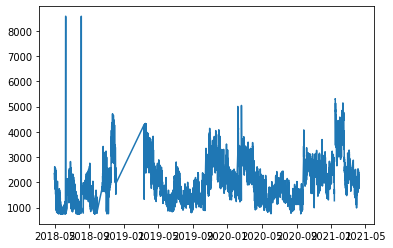

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# plot
plt.plot( 'date', 'CO2(ppm)', data=cd_krabben_full)

# show the graph
plt.show()

In [54]:
cd_krabben_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21821 entries, 65107 to 2348
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      21821 non-null  datetime64[ns]
 1   Farmer                    21821 non-null  object        
 2   CO2(ppm)                  21747 non-null  float64       
 3   Luchtvochtigheid(%)       21747 non-null  float64       
 4   Temperatuur(°C)           21747 non-null  float64       
 5   Luchtvochtigheid|Weer(%)  17791 non-null  float64       
 6   Temperatuur|Weer(°C)      21671 non-null  float64       
 7   NH3(ppm)                  17791 non-null  float64       
 8   Month                     21821 non-null  int64         
 9   Year                      21821 non-null  int64         
 10  Round                     17791 non-null  float64       
 11  Round_c                   4030 non-null   float64       
dtypes: datetime64[n

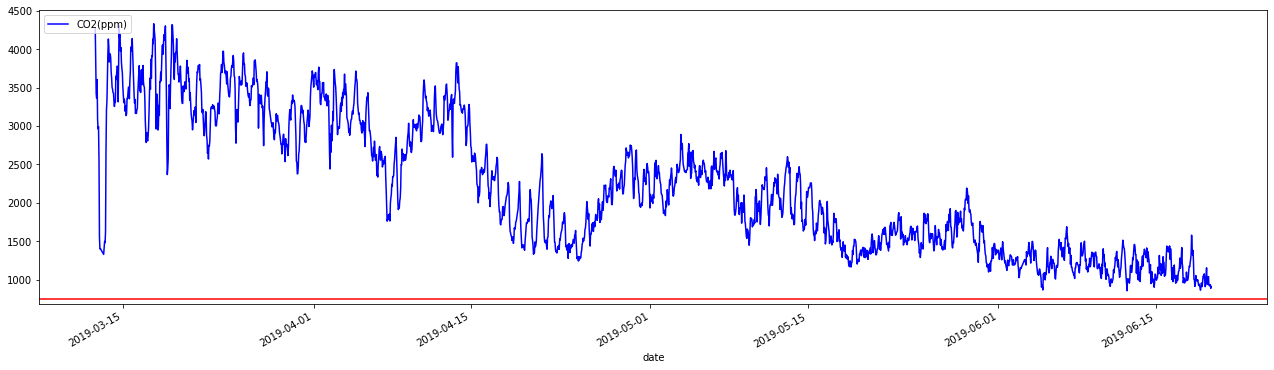

In [55]:
plot_p_zoom(cd_krabben_full,'date','CO2(ppm)','2019-03-01','2019-06-20',750)

## Early Plots

In [56]:
# num = 1;
# for farm in climate_data_all_farms_cleaned:
#         plot_p(farm,"date", "CO2(ppm)",num, 750)
#         plot_p(farm,"date", "Round",num,0)
#         num = num + 1

In [57]:
# y = cd_krabben_full['CO2(ppm)']
# fig = go.Figure()
# fig.add_trace(go.Scatter(
#             x = 
#             y = cd_krabben_full['CO2(ppm)'],
#             line =  dict(shape =  'spline' ),
#             name = 'signal with noise'
#             ))
# fig.show()
# num = 1;
# for farm in climate_data_all_farms_cleaned:
#         plot_p(farm,"date", "Round",num,0)
#         num = num + 1

In [58]:
# num = 1;
# for farm in climate_data_all_farms_cleaned:
#         plot_p(farm,"date", "Luchtvochtigheid(%)",num,0)
#         num = num + 1

In [59]:
 # cd_lavagro_full.plot("date", "CO2(ppm)") 

## Rounds' Search

In [60]:
num_days_per_round = [80, 130]
num_days_per_round

[80, 130]

In [61]:
climate_data_all_farms_cleaned[0].head()

,date,Farmer,CO2(ppm),Luchtvochtigheid(%),Temperatuur(°C),Luchtvochtigheid|Weer(%),Temperatuur|Weer(°C),NH3(ppm),Month,Year,Round,Round_c
65107,2018-05-01 00:00:00,Farm_1,2345.000000,57.451667,22.753333,13.333333,1.191667,0.0,5,2018,2.0,NaN
65108,2018-05-01 01:00:00,Farm_1,2332.428571,58.277143,23.372857,11.571429,0.961429,0.0,5,2018,2.0,NaN
65109,2018-05-01 02:00:00,Farm_1,2265.000000,56.965714,23.212857,12.857143,0.891429,0.0,5,2018,2.0,NaN
65110,2018-05-01 03:00:00,Farm_1,2224.571429,56.015714,23.288571,13.571429,0.898571,0.0,5,2018,2.0,NaN
65111,2018-05-01 04:00:00,Farm_1,2303.428571,56.511429,23.448571,13.142857,1.010000,0.0,5,2018,2.0,NaN


In [62]:
climate_data_all_farms_cleaned[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21821 entries, 65107 to 2348
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      21821 non-null  datetime64[ns]
 1   Farmer                    21821 non-null  object        
 2   CO2(ppm)                  21747 non-null  float64       
 3   Luchtvochtigheid(%)       21747 non-null  float64       
 4   Temperatuur(°C)           21747 non-null  float64       
 5   Luchtvochtigheid|Weer(%)  17791 non-null  float64       
 6   Temperatuur|Weer(°C)      21671 non-null  float64       
 7   NH3(ppm)                  17791 non-null  float64       
 8   Month                     21821 non-null  int64         
 9   Year                      21821 non-null  int64         
 10  Round                     17791 non-null  float64       
 11  Round_c                   4030 non-null   float64       
dtypes: datetime64[n

In [63]:
def find_possible_startEnd_dates_given_rounds(df):
  lastValue_round = 0
  newValue_round = 0
  possible_changing_dates = []
  for i in range(1, len(df)):
    lastValue_round = df.iloc[i-1, 10]
    newValue_round = df.iloc[i, 10]
    if lastValue_round != newValue_round and not np.isnan(newValue_round) and not np.isnan(lastValue_round): 
      possible_changing_dates.append(cd_krabben_full.iloc[i, 0])
  possible_changing_dates
  return possible_changing_dates

In [64]:
def get_length_possible_rounds(dates):
  length = []
  for i in range(0, len(dates)-1):
    # delta_time = df[i+1] - df[i]
    # delta_time_days = delta_time.days()  
    delta_time_days = dates[i+1].date() - dates[i].date()
    length.append(delta_time_days)
  return length



In [65]:
  dates = find_possible_startEnd_dates_given_rounds(cd_krabben_full)
  #print(dates)
  print(get_length_possible_rounds(dates))

[datetime.timedelta(days=8), datetime.timedelta(days=214), datetime.timedelta(days=1), datetime.timedelta(days=100), datetime.timedelta(days=118), datetime.timedelta(days=1), datetime.timedelta(days=111), datetime.timedelta(days=127), datetime.timedelta(days=1), datetime.timedelta(days=104)]


[datetime.timedelta(days=8), datetime.timedelta(days=214), datetime.timedelta(days=1), datetime.timedelta(days=100), datetime.timedelta(days=118), datetime.timedelta(days=1), datetime.timedelta(days=111), datetime.timedelta(days=127), datetime.timedelta(days=1), datetime.timedelta(days=104)]


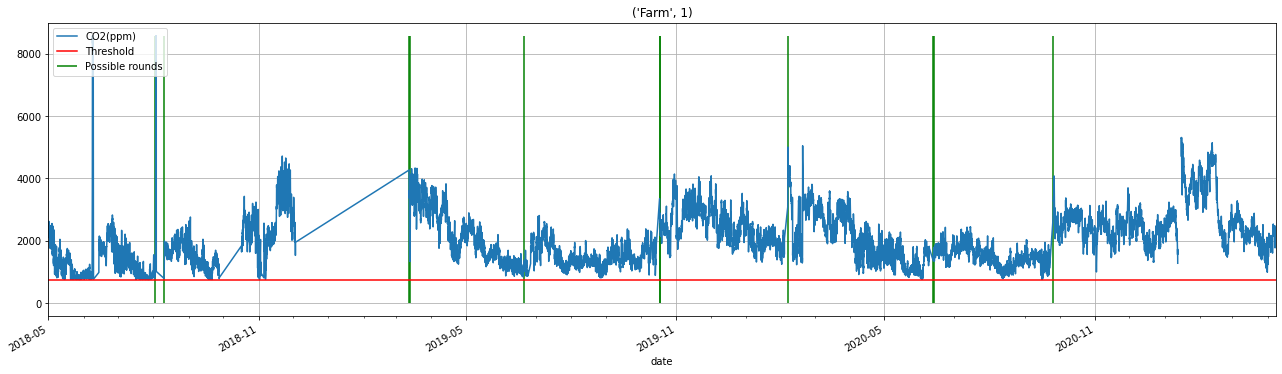

[datetime.timedelta(0), datetime.timedelta(days=222), datetime.timedelta(days=50), datetime.timedelta(days=102), datetime.timedelta(days=3), datetime.timedelta(days=74)]


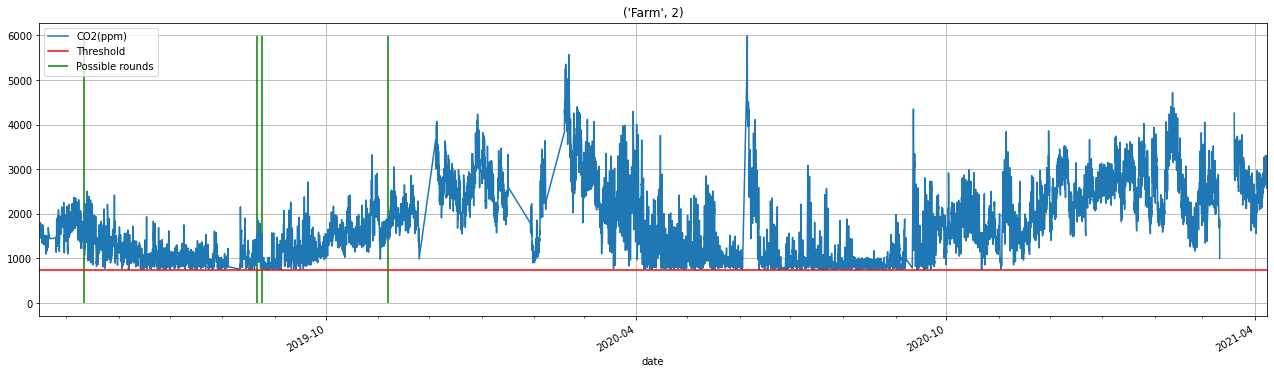

[datetime.timedelta(days=1), datetime.timedelta(days=224), datetime.timedelta(days=47), datetime.timedelta(0), datetime.timedelta(days=91), datetime.timedelta(0), datetime.timedelta(days=120), datetime.timedelta(0), datetime.timedelta(days=114), datetime.timedelta(days=116)]


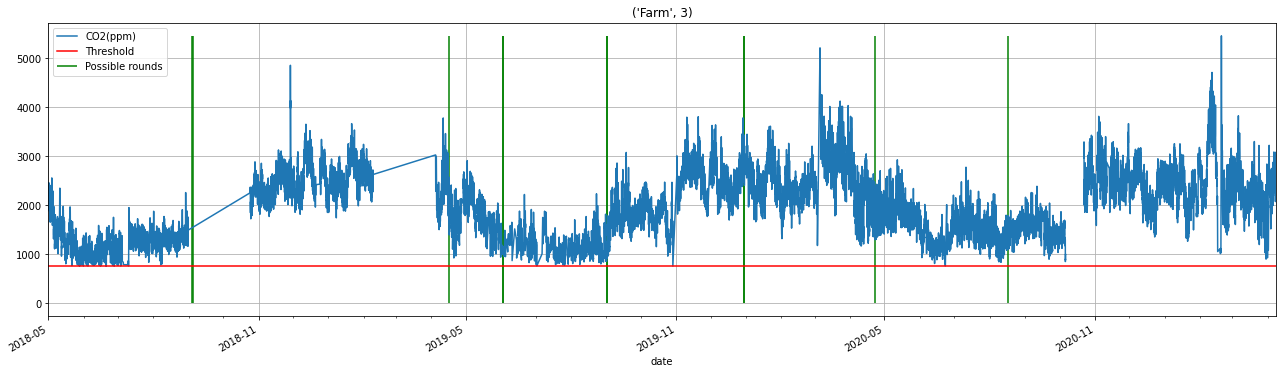

[datetime.timedelta(days=7), datetime.timedelta(days=144), datetime.timedelta(days=1), datetime.timedelta(days=324)]


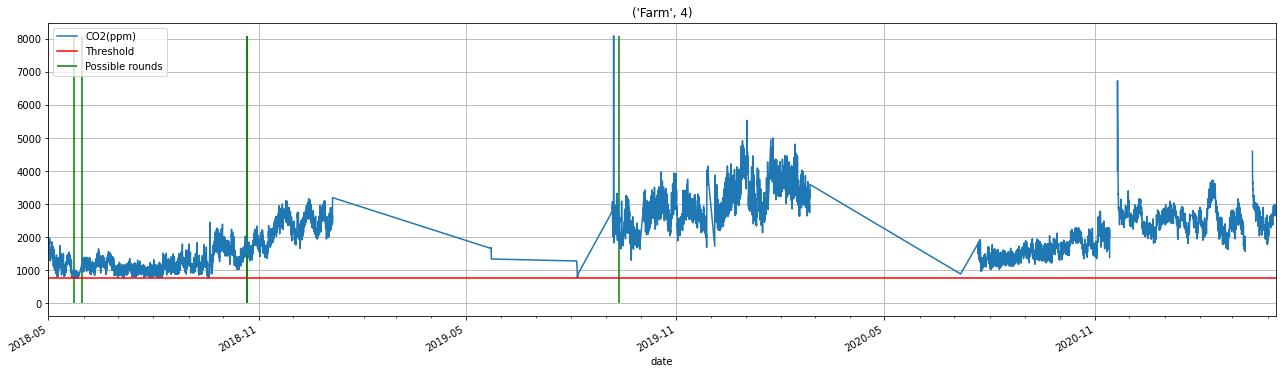

[datetime.timedelta(days=136), datetime.timedelta(0), datetime.timedelta(days=218), datetime.timedelta(days=112), datetime.timedelta(days=101)]


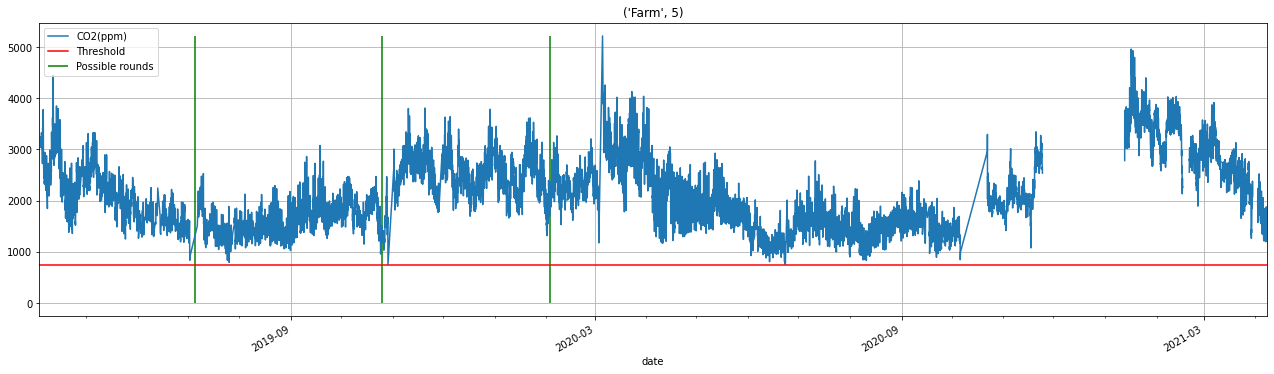

[datetime.timedelta(0), datetime.timedelta(days=235), datetime.timedelta(days=3), datetime.timedelta(days=133), datetime.timedelta(days=127)]


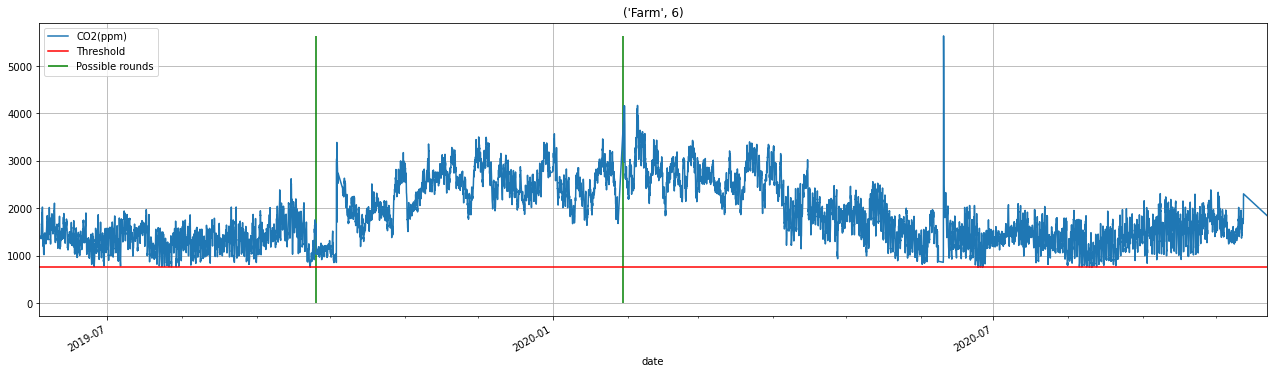

[datetime.timedelta(days=1), datetime.timedelta(days=123), datetime.timedelta(days=216), datetime.timedelta(days=117), datetime.timedelta(days=96)]


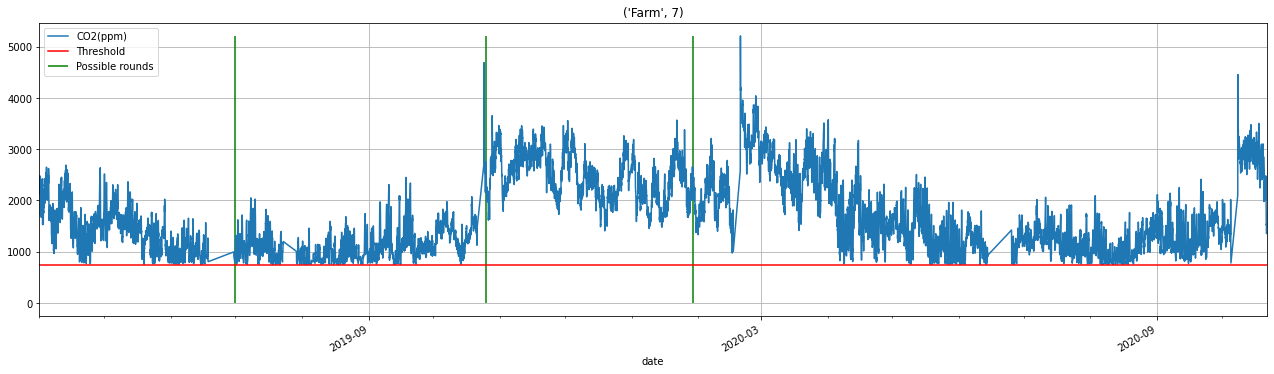

[datetime.timedelta(days=130), datetime.timedelta(days=25), datetime.timedelta(days=170), datetime.timedelta(days=80), datetime.timedelta(days=9), datetime.timedelta(days=37), datetime.timedelta(days=11), datetime.timedelta(days=98), datetime.timedelta(days=13), datetime.timedelta(days=107), datetime.timedelta(days=1), datetime.timedelta(days=118)]


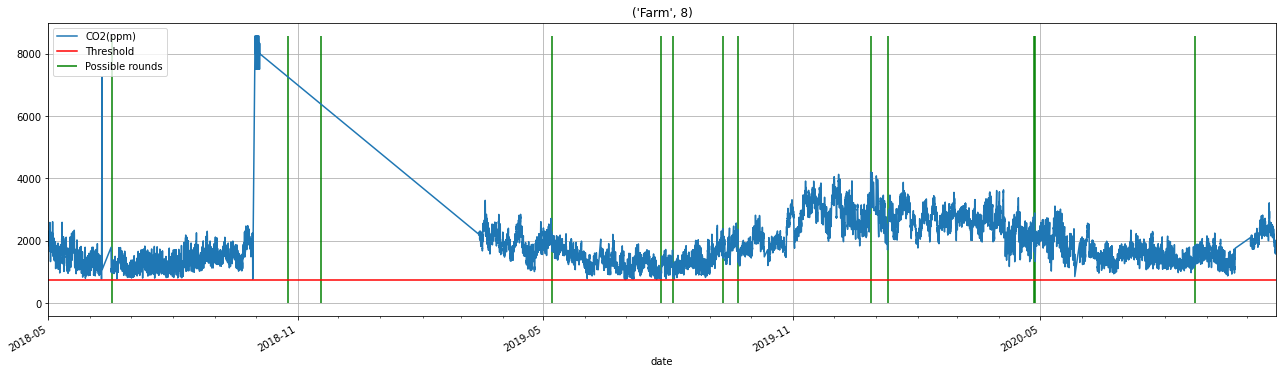

[datetime.timedelta(days=9), datetime.timedelta(days=192), datetime.timedelta(days=1), datetime.timedelta(days=125), datetime.timedelta(0), datetime.timedelta(days=124), datetime.timedelta(days=6), datetime.timedelta(days=132)]


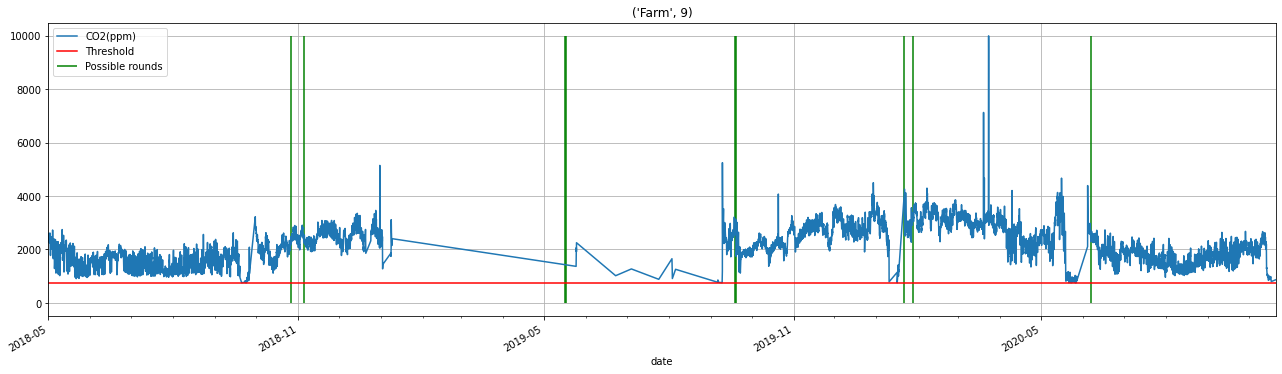

[datetime.timedelta(days=18), datetime.timedelta(days=261), datetime.timedelta(days=21), datetime.timedelta(days=127), datetime.timedelta(days=1), datetime.timedelta(days=75), datetime.timedelta(days=121), datetime.timedelta(days=1), datetime.timedelta(days=116)]


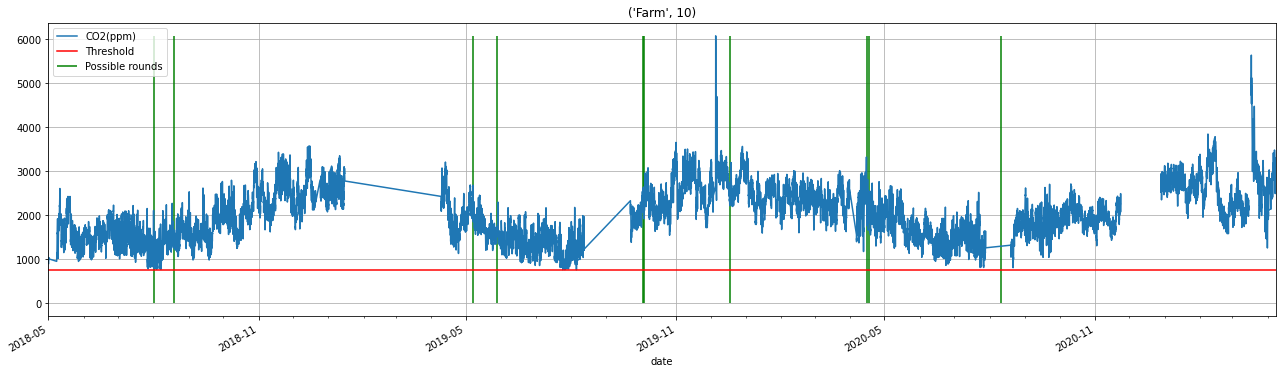

[datetime.timedelta(days=126), datetime.timedelta(days=222), datetime.timedelta(days=96), datetime.timedelta(days=7), datetime.timedelta(days=102), datetime.timedelta(days=1)]


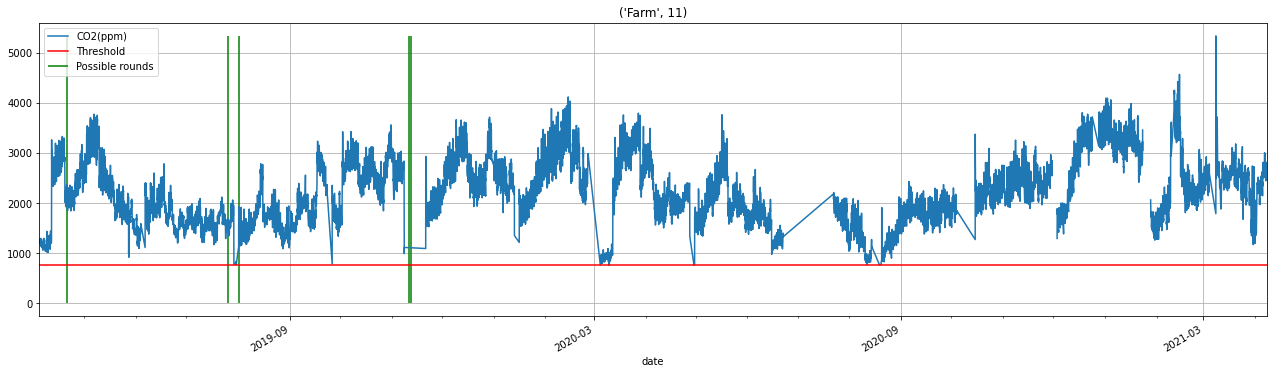

In [69]:

num = 1;
length_rounds_all_farms = []
all_possible_dates = []

for farm in climate_data_all_farms_cleaned:
  dates = find_possible_startEnd_dates_given_rounds(farm)
  all_possible_dates.append(dates)
  length = get_length_possible_rounds(dates)
  print(length)
  length_rounds_all_farms.append(length)
  plot_with_rounds_separation(farm,dates,'date','CO2(ppm)',num,750)
  num = num + 1



In [70]:
le = cd_krabben_full.iloc[cd_krabben_full.shape[0]-1][0].date() - cd_krabben_full.iloc[0][0].date() 
print(le)
months = le/30
months
# cd_krabben_full.shape[0]
# for i in range(0, len(dates)-1):
#     # delta_time = df[i+1] - df[i]
#     # delta_time_days = delta_time.days()  
#     delta_time_days = dates[i+1].date() - dates[i].date()
#     length.append(delta_time_days)
#   return length

1073 days, 0:00:00


datetime.timedelta(days=35, seconds=66240)

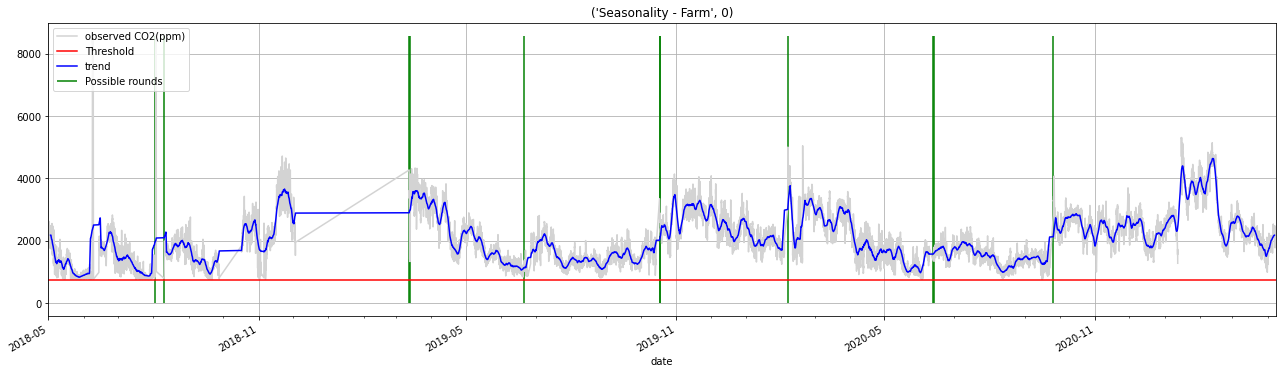

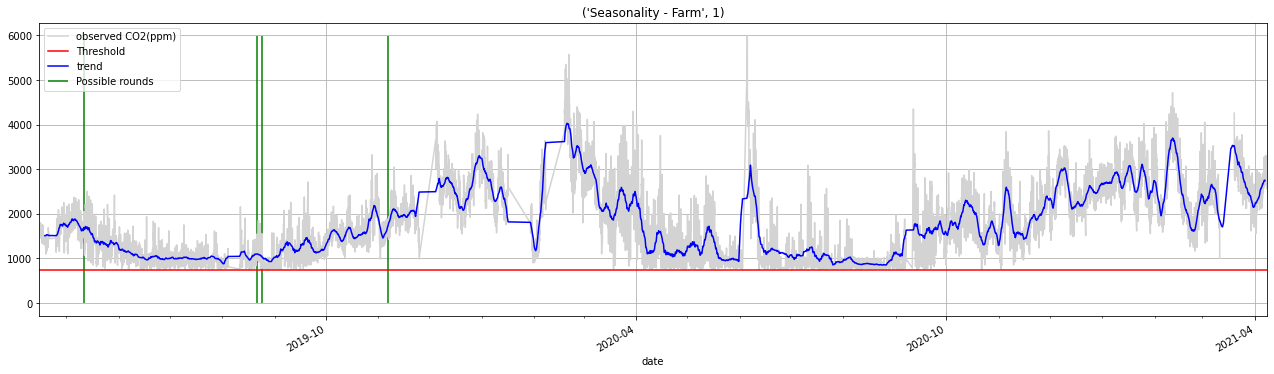

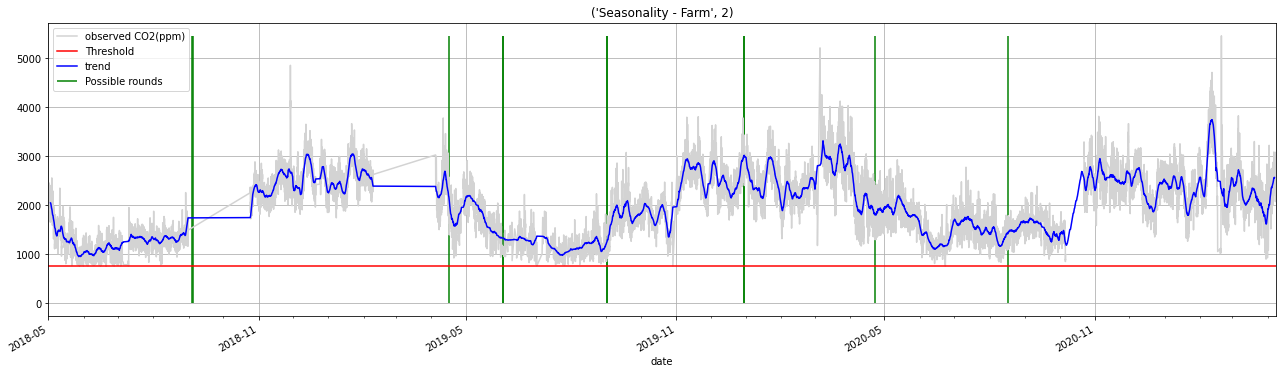

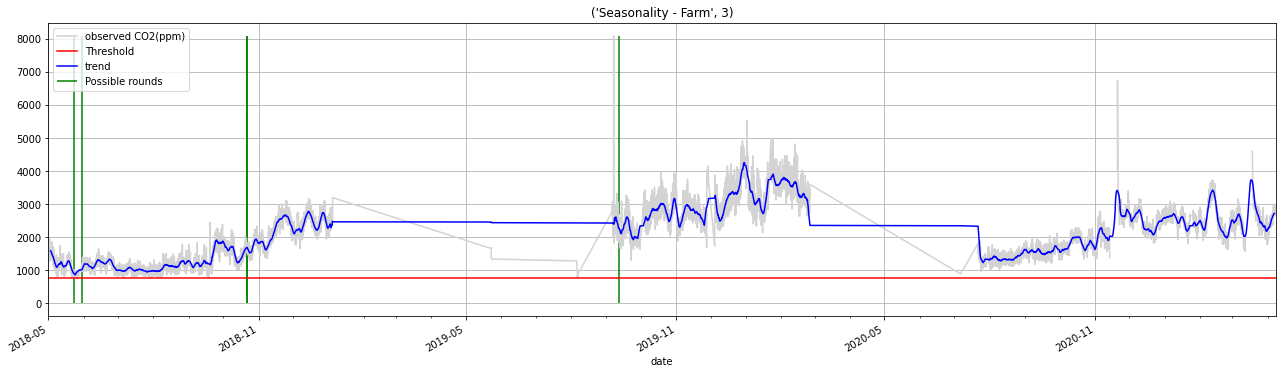

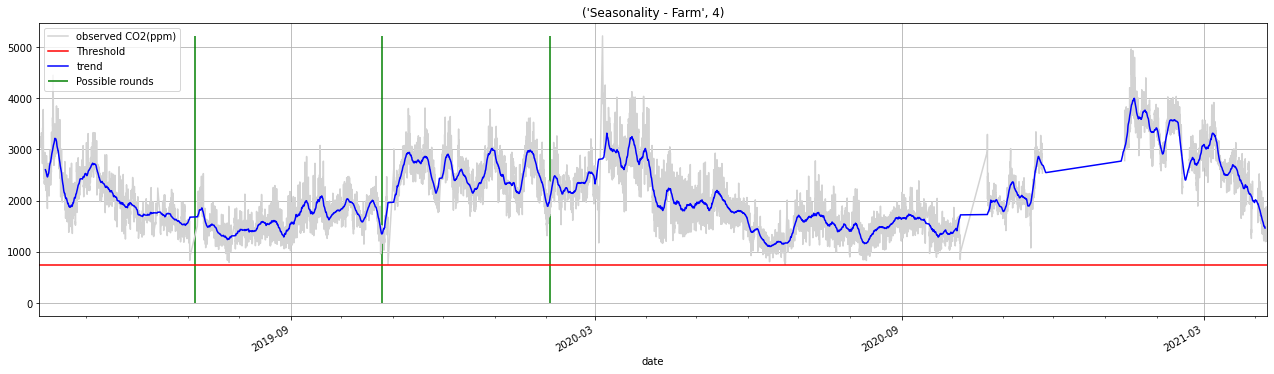

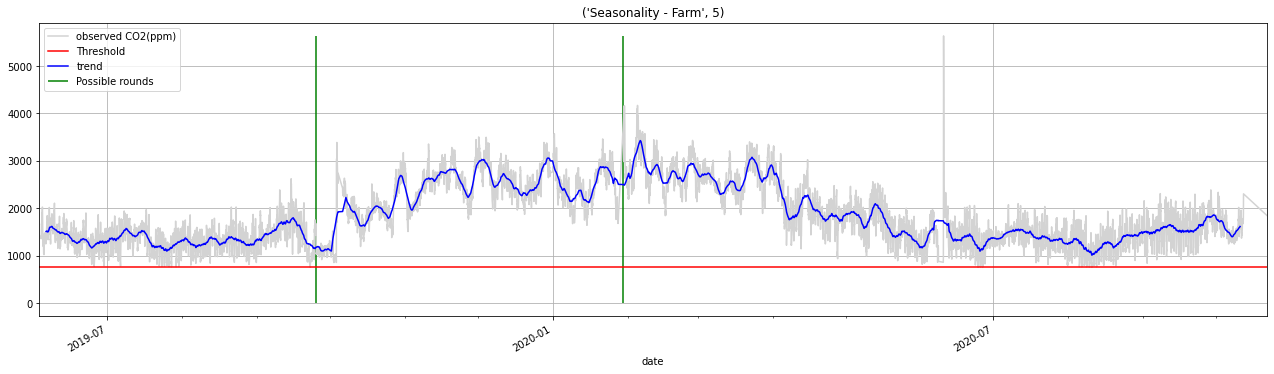

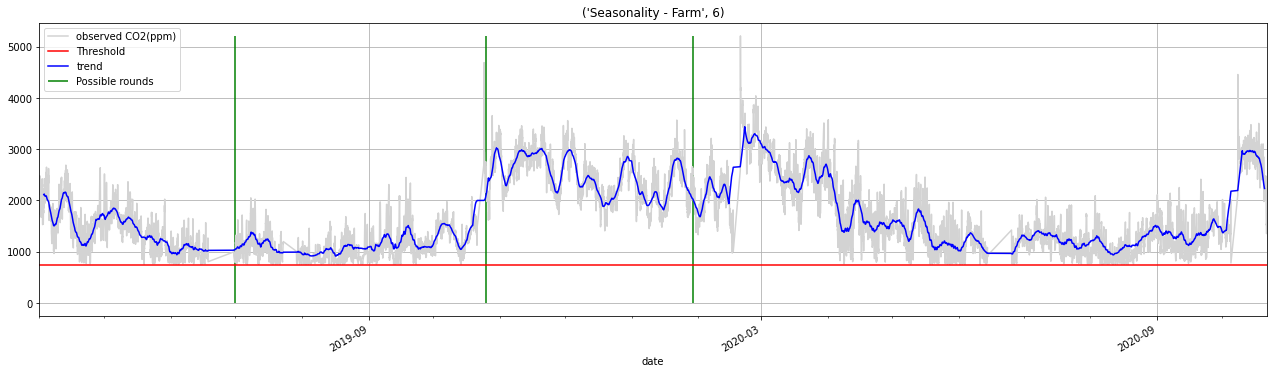

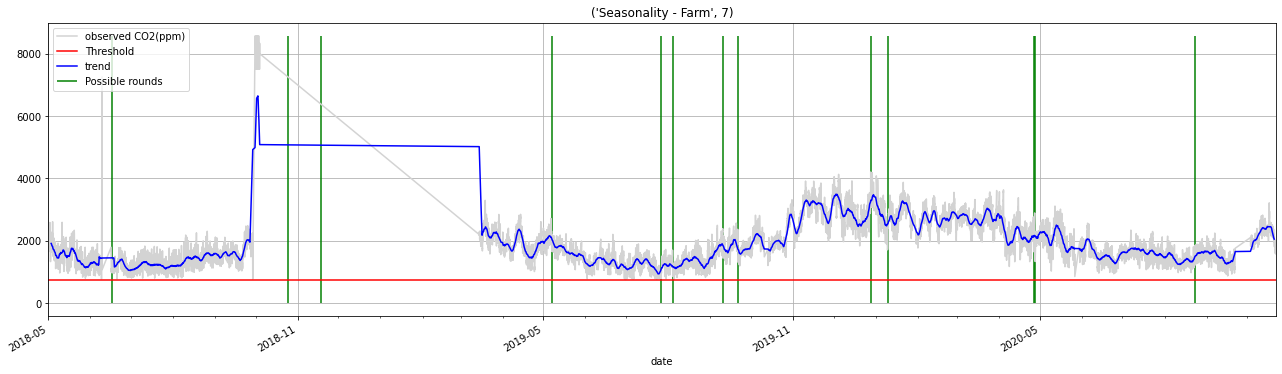

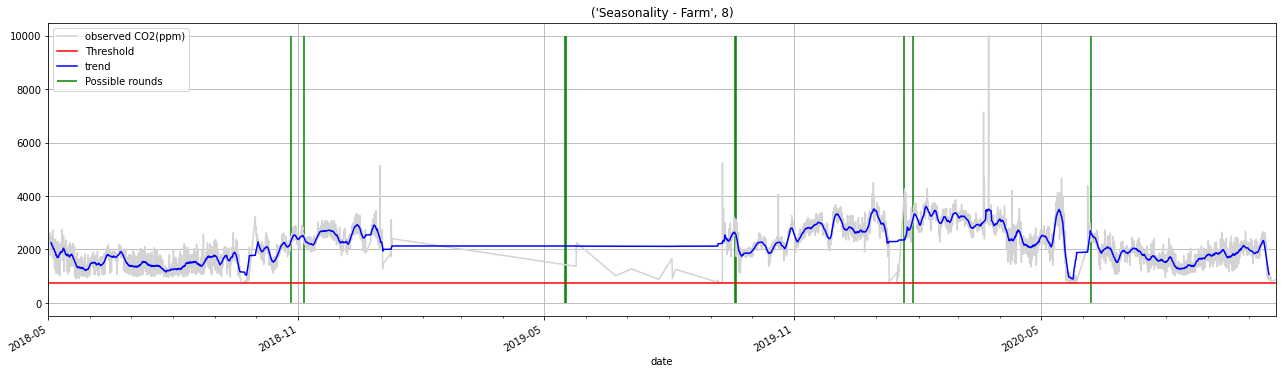

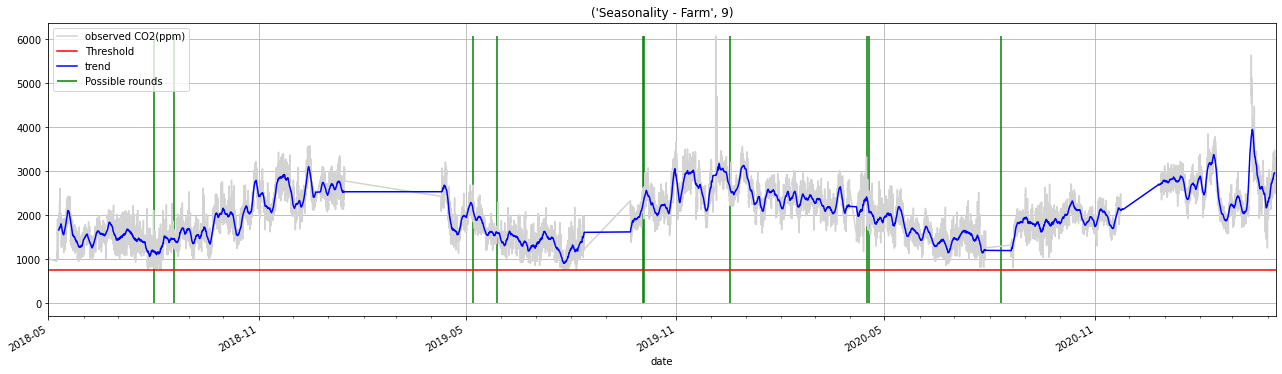

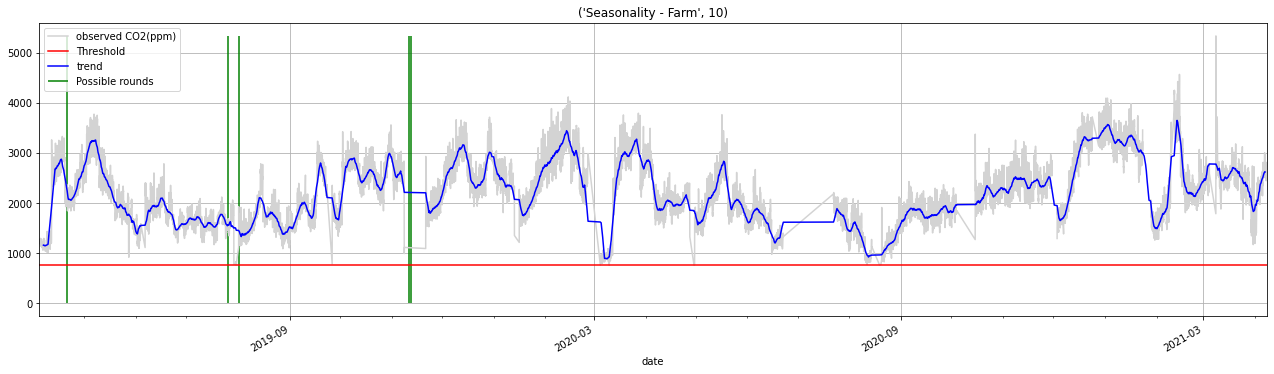

In [71]:
# Seasonality plots 
num = 0
for farm in climate_data_all_farms_cleaned:
  plot_sep_decomposed_seasonality(farm,all_possible_dates[num],'date','CO2(ppm)',num,750,100)
  num = num + 1

In [72]:
#data['date'][1]

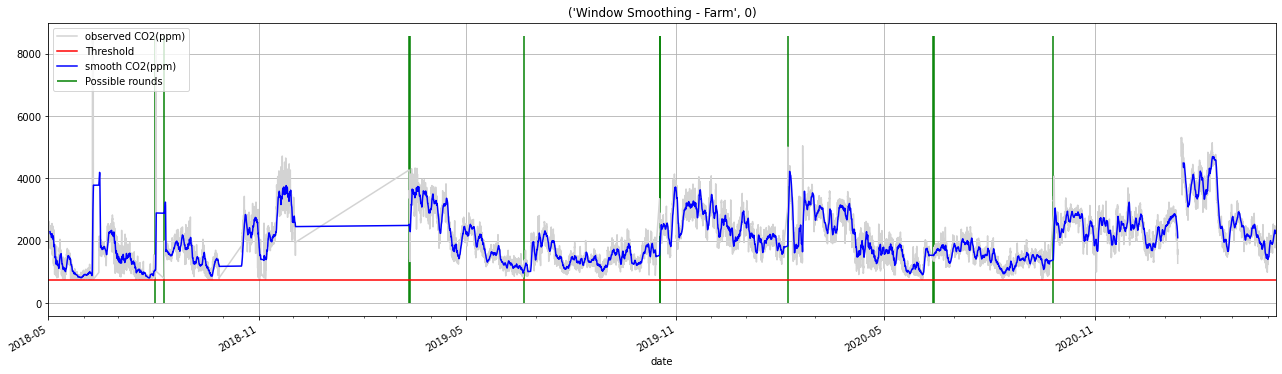

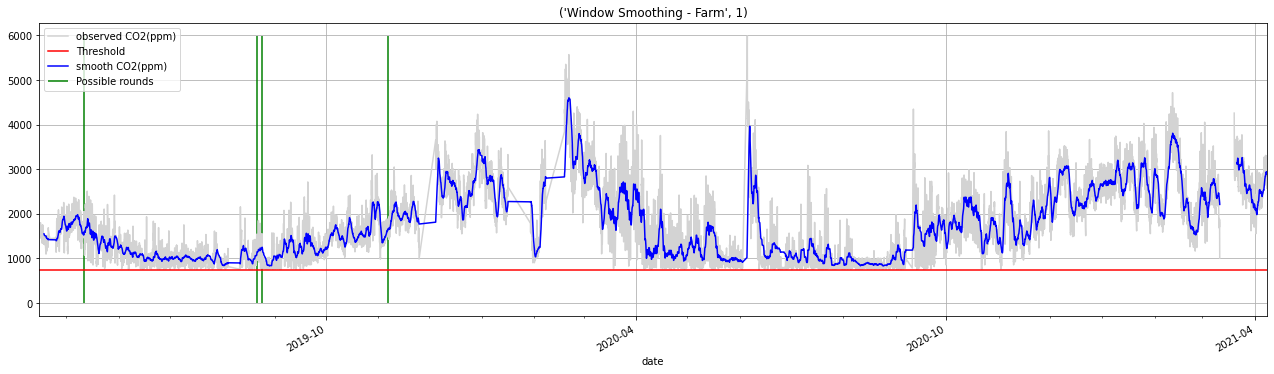

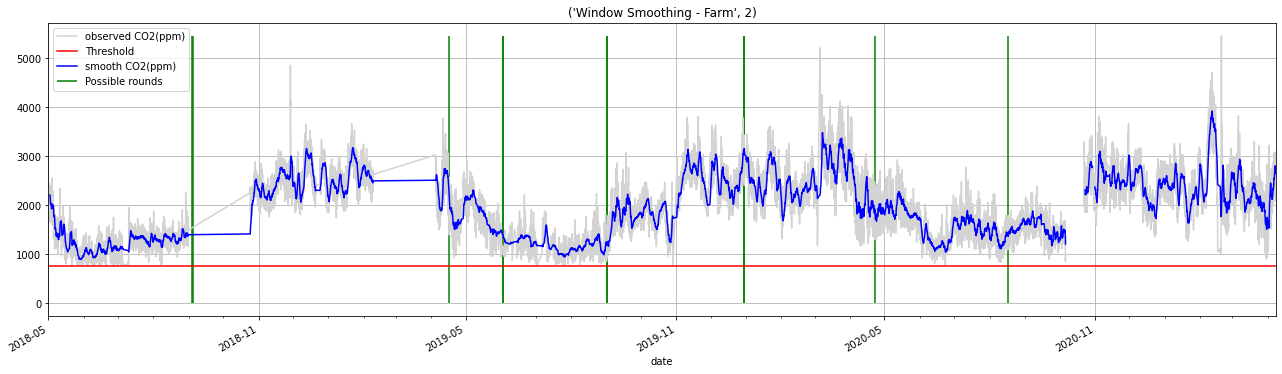

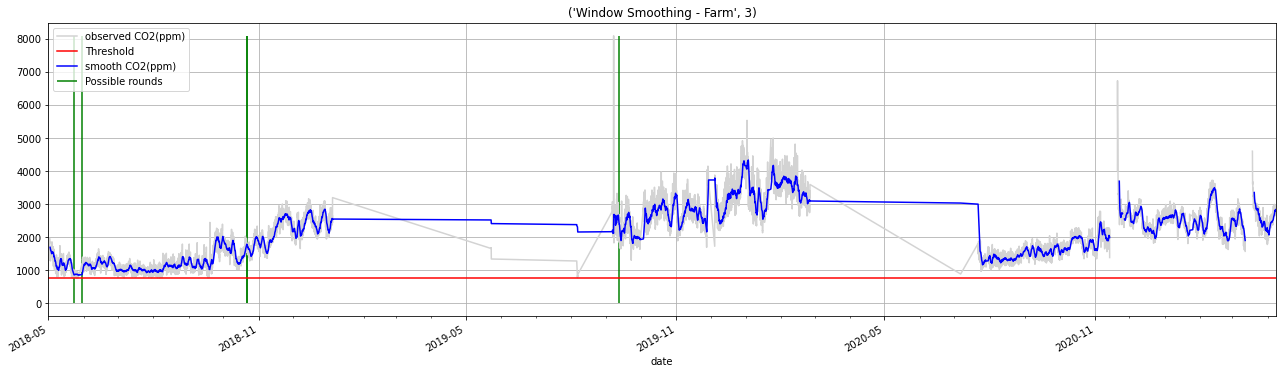

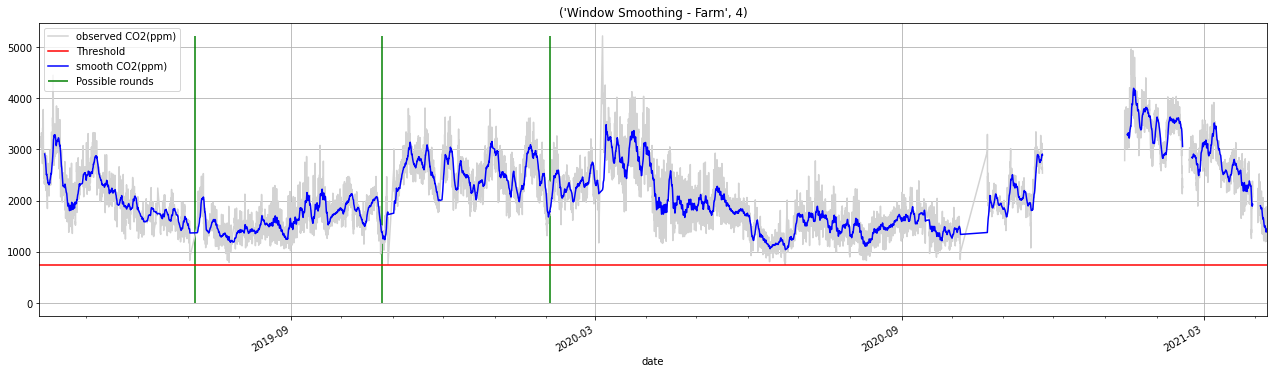

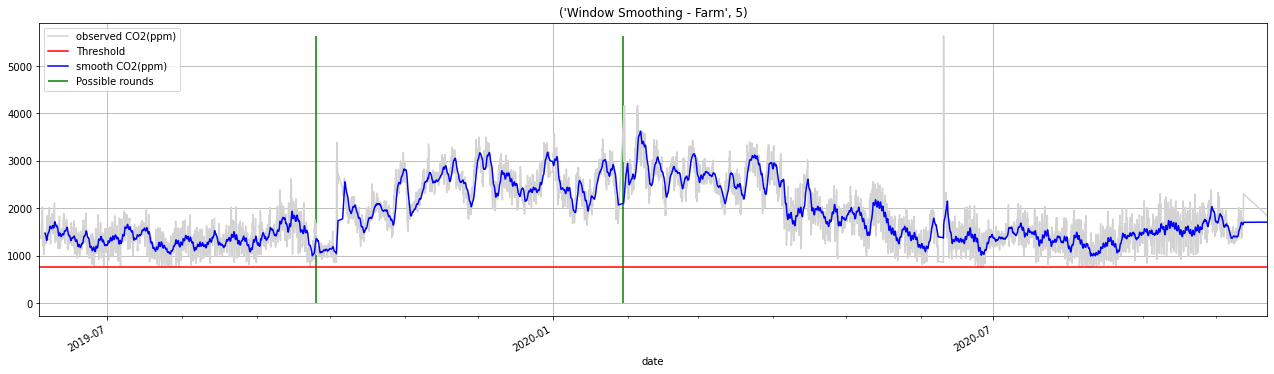

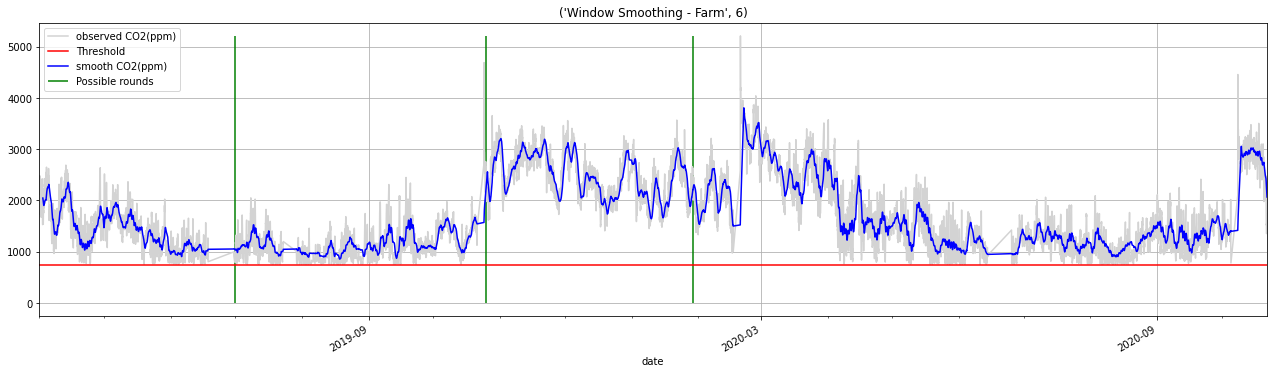

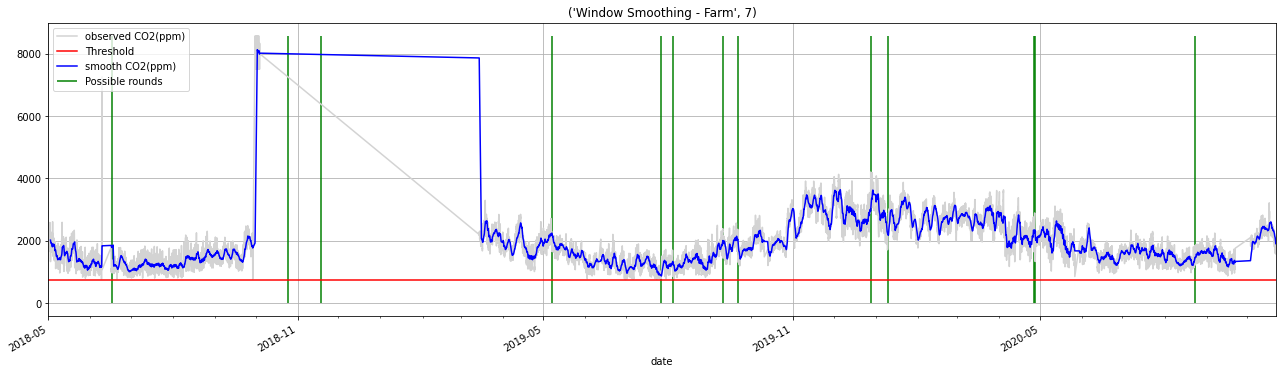

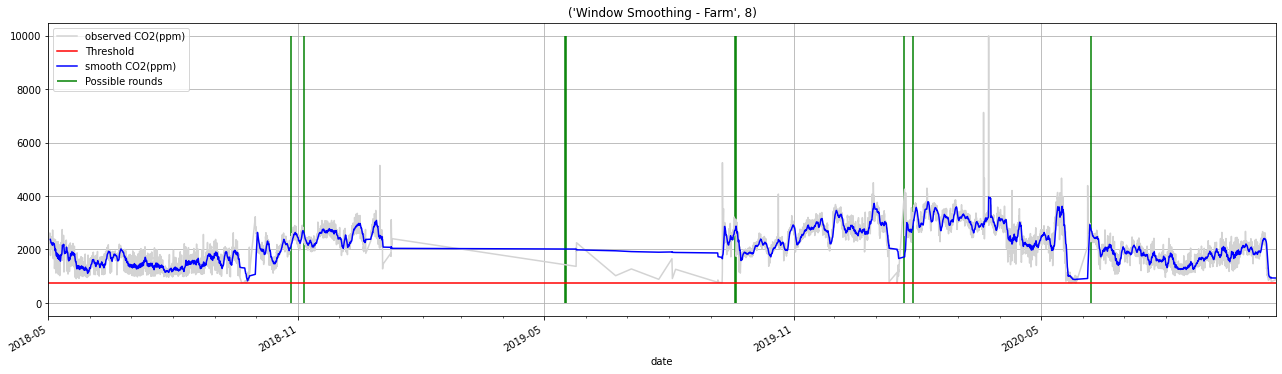

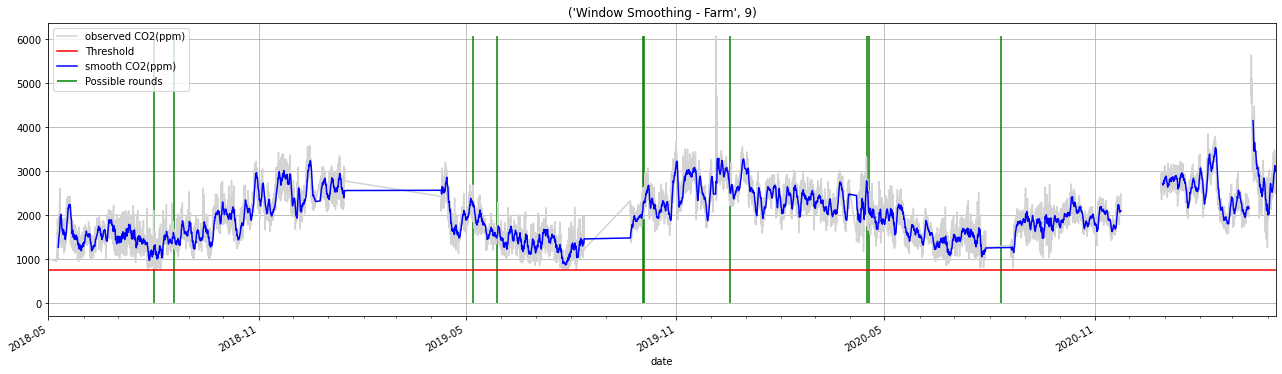

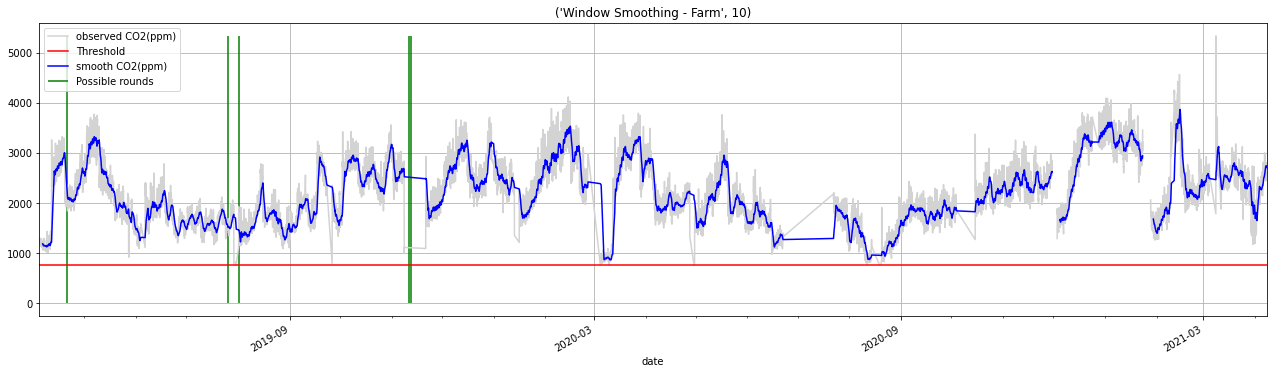

In [73]:
# Smoothed 
num = 0
for farm in climate_data_all_farms_cleaned:
  plot_sep_smoothed(farm,all_possible_dates[num],'date','CO2(ppm)',num,750,40)
  num = num + 1

In [74]:
# plot_sep_smoothed(cd_lavrijsen_full,all_possible_dates[2],'date','CO2(ppm)',1,750,40)
# plot_sep_decomposed_seasonality(cd_peelen_full,all_possible_dates[2],'date','CO2(ppm)',1,750,100)

## Methods to create the features


In [80]:
# df to test the methods and be able to check the results

df = cd_krabben_full.head(150)

# dfd = delta_value_2cons_h(d,"CO2(ppm)")
# dfd = delta_value_2cons_h(d,"Luchtvochtigheid(%)")
# dfd = delta_value_2cons_h(d,"Temperatuur(°C)")
# dfd = delta_value_2cons_h(d,"Luchtvochtigheid|Weer(%)")
# dfd = delta_value_2cons_h(d,"Temperatuur|Weer(°C)")
# dfd = delta_value_2cons_h(d,"NH3(ppm)")

# df['week'] = df['date'].dt.strftime('%W')
# df['year_week'] = df['Year'].astype(str) + df['week'].astype(str)
# df = df.groupby([df['year_week']])['CO2(ppm)'].mean()
# df.groupby(['name', df['date'].dt.strftime('%W')])
print(df)

# df = df.groupby([df['date'].dt.date])[feature].mean()
# print(dfd)

year_week
201818    1998.694692
201819    1473.816667
Name: CO2(ppm), dtype: float64


In [77]:
df.head()

,date,Farmer,CO2(ppm),Luchtvochtigheid(%),Temperatuur(°C),Luchtvochtigheid|Weer(%),Temperatuur|Weer(°C),NH3(ppm),Month,Year,Round,Round_c,smooth,week
65107,2018-05-01 00:00:00,Farm_1,2345.000000,57.451667,22.753333,13.333333,1.191667,0.0,5,2018,2.0,NaN,NaN,18
65108,2018-05-01 01:00:00,Farm_1,2332.428571,58.277143,23.372857,11.571429,0.961429,0.0,5,2018,2.0,NaN,NaN,18
65109,2018-05-01 02:00:00,Farm_1,2265.000000,56.965714,23.212857,12.857143,0.891429,0.0,5,2018,2.0,NaN,NaN,18
65110,2018-05-01 03:00:00,Farm_1,2224.571429,56.015714,23.288571,13.571429,0.898571,0.0,5,2018,2.0,NaN,NaN,18
65111,2018-05-01 04:00:00,Farm_1,2303.428571,56.511429,23.448571,13.142857,1.010000,0.0,5,2018,2.0,NaN,NaN,18


In [ ]:
def get_daily_avgs(df):
  #print(df.groupby([df['date'].dt.date])[feature].mean())
  # df['daily_avg_'+feature] = df.groupby([df['date'].dt.date])[feature].mean()
  # daily_avg_CO2 = df.groupby([df['date'].dt.date])[feature].mean()
  daily_avg_CO2 = df.groupby([df['date'].dt.date])['CO2(ppm)'].mean()
  daily_avg_temp = df.groupby([df['date'].dt.date])['Temperatuur(°C)'].mean()
  daily_avg_luchtvochtigheid = df.groupby([df['date'].dt.date])['Luchtvochtigheid(%)'].mean()
  daily_avg_luchtvochtigheid_weer = df.groupby([df['date'].dt.date])['Luchtvochtigheid|Weer(%)'].mean()
  daily_avg_NH3 = df.groupby([df['date'].dt.date])['NH3(ppm)'].mean()
  daily_avg_temperatuur_weer = df.groupby([df['date'].dt.date])['Temperatuur|Weer(°C)'].mean()

  daily_avgs = pd.concat([daily_avg_CO2, daily_avg_temp, daily_avg_luchtvochtigheid, 
                          daily_avg_luchtvochtigheid_weer, daily_avg_NH3,
                          daily_avg_temperatuur_weer], axis=1)
  #avg['date'] = avg.index
  daily_avgs.reset_index(level=0, inplace=True)

  # print(daily_avgs)
  # print(daily_avgs.info())
  return daily_avg

In [83]:
def get_weekly_avgs(df):

  df['week'] = df['date'].dt.strftime('%W')
  df['year_week'] = df['Year'].astype(str) + df['week'].astype(str)

  weekly_avg_CO2 = df.groupby([df['year_week']])['CO2(ppm)'].mean()
  weekly_avg_temp = df.groupby([df['year_week']])['Temperatuur(°C)'].mean()
  weekly_avg_luchtvochtigheid = df.groupby([df['year_week']])['Luchtvochtigheid(%)'].mean()
  weekly_avg_luchtvochtigheid_weer = df.groupby([df['year_week']])['Luchtvochtigheid|Weer(%)'].mean()
  weekly_avg_NH3 = df.groupby([df['year_week']])['NH3(ppm)'].mean()
  weekly_avg_temperatuur_weer = df.groupby([df['year_week']])['Temperatuur|Weer(°C)'].mean()

  weekly_avgs = pd.concat([weekly_avg_CO2, weekly_avg_temp, weekly_avg_luchtvochtigheid, 
                           weekly_avg_luchtvochtigheid_weer, weekly_avg_NH3,
                           weekly_avg_temperatuur_weer], axis=1)

  weekly_avgs.reset_index(level=0, inplace=True)

  # print(weekly_avgs)
  # print(weekly_avgs.info())
  # weekly_avgs.head()
  return weekly_avgs

In [85]:
def get_weekly_min(df):

  df['week'] = df['date'].dt.strftime('%W')
  df['year_week'] = df['Year'].astype(str) + df['week'].astype(str)

  weekly_min_CO2 = df.groupby([df['year_week']])['CO2(ppm)'].min()
  weekly_min_temp = df.groupby([df['year_week']])['Temperatuur(°C)'].min()
  weekly_min_luchtvochtigheid = df.groupby([df['year_week']])['Luchtvochtigheid(%)'].min()
  weekly_min_luchtvochtigheid_weer = df.groupby([df['year_week']])['Luchtvochtigheid|Weer(%)'].min()
  weekly_min_NH3 = df.groupby([df['year_week']])['NH3(ppm)'].min()
  weekly_min_temperatuur_weer = df.groupby([df['year_week']])['Temperatuur|Weer(°C)'].min()

  weekly_mins = pd.concat([weekly_min_CO2, weekly_min_temp, weekly_min_luchtvochtigheid, 
                           weekly_min_luchtvochtigheid_weer, weekly_min_NH3,
                           weekly_min_temperatuur_weer], axis=1)

  weekly_mins.reset_index(level=0, inplace=True)

  # print(weekly_mins)
  # print(weekly_mins.info())
  # weekly_mins.head()
  return weekly_mins

In [ ]:
def get_weekly_max(df):

  df['week'] = df['date'].dt.strftime('%W')
  df['year_week'] = df['Year'].astype(str) + df['week'].astype(str)

  weekly_max_CO2 = df.groupby([df['year_week']])['CO2(ppm)'].max()
  weekly_max_temp = df.groupby([df['year_week']])['Temperatuur(°C)'].max()
  weekly_max_luchtvochtigheid = df.groupby([df['year_week']])['Luchtvochtigheid(%)'].max()
  weekly_max_luchtvochtigheid_weer = df.groupby([df['year_week']])['Luchtvochtigheid|Weer(%)'].max()
  weekly_max_NH3 = df.groupby([df['year_week']])['NH3(ppm)'].max()
  weekly_max_temperatuur_weer = df.groupby([df['year_week']])['Temperatuur|Weer(°C)'].max()

  weekly_maxs = pd.concat([weekly_max_CO2, weekly_max_temp, weekly_max_luchtvochtigheid, 
                           weekly_max_luchtvochtigheid_weer, weekly_max_NH3,
                           weekly_max_temperatuur_weer], axis=1)

  weekly_maxs.reset_index(level=0, inplace=True)

  # print(weekly_maxs)
  # print(weekly_maxs.info())
  # weekly_maxs.head()
  return weekly_maxs

In [ ]:
def get_weekly_median(df):

  df['week'] = df['date'].dt.strftime('%W')
  df['year_week'] = df['Year'].astype(str) + df['week'].astype(str)

  weekly_median_CO2 = df.groupby([df['year_week']])['CO2(ppm)'].median()
  weekly_median_temp = df.groupby([df['year_week']])['Temperatuur(°C)'].median()
  weekly_median_luchtvochtigheid = df.groupby([df['year_week']])['Luchtvochtigheid(%)'].median()
  weekly_median_luchtvochtigheid_weer = df.groupby([df['year_week']])['Luchtvochtigheid|Weer(%)'].median()
  weekly_median_NH3 = df.groupby([df['year_week']])['NH3(ppm)'].median()
  weekly_median_temperatuur_weer = df.groupby([df['year_week']])['Temperatuur|Weer(°C)'].median()

  weekly_medians = pd.concat([weekly_median_CO2, weekly_median_temp, weekly_median_luchtvochtigheid, 
                           weekly_median_luchtvochtigheid_weer, weekly_median_NH3,
                           weekly_median_temperatuur_weer], axis=1)

  weekly_medians.reset_index(level=0, inplace=True)

  # print(weekly_medians)
  # print(weekly_medians.info())
  # weekly_medians.head()
  return weekly_medians

In [86]:
def get_weekly_std(df):

  df['week'] = df['date'].dt.strftime('%W')
  df['year_week'] = df['Year'].astype(str) + df['week'].astype(str)

  weekly_std_CO2 = stdev(df.groupby([df['year_week']])['CO2(ppm)'])
  weekly_std_temp = stdev(df.groupby([df['year_week']])['Temperatuur(°C)'])
  weekly_std_luchtvochtigheid = stdev(df.groupby([df['year_week']])['Luchtvochtigheid(%)'])
  weekly_std_luchtvochtigheid_weer = stdev(df.groupby([df['year_week']])['Luchtvochtigheid|Weer(%)'])
  weekly_std_NH3 = stdev(df.groupby([df['year_week']])['NH3(ppm)'])
  weekly_std_temperatuur_weer = stdev(df.groupby([df['year_week']])['Temperatuur|Weer(°C)'])

  weekly_stds = pd.concat([weekly_std_CO2, weekly_std_temp, weekly_std_luchtvochtigheid, 
                           weekly_std_luchtvochtigheid_weer, weekly_std_NH3,
                           weekly_std_temperatuur_weer], axis=1)

  weekly_stds.reset_index(level=0, inplace=True)

  # print(weekly_medians)
  # print(weekly_medians.info())
  # weekly_medians.head()
  return weekly_stds

In [84]:
df = cd_krabben_full.head(100)
d = get_weekly_avgs(df)
# d.head()
# df.head(100)

  year_week     CO2(ppm)  ...  NH3(ppm)  Temperatuur|Weer(°C)
0    201818  2173.294262  ...       0.0              1.416807

[1 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year_week                 1 non-null      object 
 1   CO2(ppm)                  1 non-null      float64
 2   Temperatuur(°C)           1 non-null      float64
 3   Luchtvochtigheid(%)       1 non-null      float64
 4   Luchtvochtigheid|Weer(%)  1 non-null      float64
 5   NH3(ppm)                  1 non-null      float64
 6   Temperatuur|Weer(°C)      1 non-null      float64
dtypes: float64(6), object(1)
memory usage: 184.0+ bytes
None


In [ ]:
# Difference of feature between 2 consecutives hours.
def delta_value_2cons_h(df,feature):
  n = df.columns.get_loc(feature)
  count = 0
  # hour - 1
  lastValue = df.iloc[0, n]
  newValue = 0

  for i, row in df.iterrows():
    if count != 0:
      # hour 
      newValue = row[n]
      
      if not np.isnan(newValue) and not np.isnan(lastValue): 
        print('yes')
        df.loc[i,'Delta_2cons_h_'+feature] = newValue - lastValue
        print("val", (newValue - lastValue))
      # hour - 1
      lastValue = newValue
    count += 1
  return df

In [ ]:
cd_krabben_full.head()

In [ ]:
for index, values in cd_krabben_full.iterrows():
    if index > 0:
      index

## Features' Creation 

In [ ]:
num = 0
daily_avgs = []
for farm in climate_data_all_farms_cleaned:
  daily_avgs[num] = get_daily_avgs(farm)
  num = num + 1

In [ ]:
num = 0
cd_farms_with_consecutives_info = []
for farm in climate_data_all_farms_cleaned:
  farm = delta_value_2cons_h(farm,'CO2(ppm)')
  farm = delta_value_2cons_h(farm,'Temperatuur(°C)')
  farm = delta_value_2cons_h(farm,'NH3(ppm)')
  num = num + 1

In [ ]:
farms